# House Price Prediction Case Study

<hr style="border:1px solid blue">

A case study to solve a business problem by building a regression model using regularization for the prediction of house prices.
* Comprehend the given data set and perform Exploratory Data Analysis (EDA) to analyse the data set.
* Build a regression model to identify the best fit variables that can predict the house prices.

### Project Description

A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. They have contracted a consulting company to understand the factors on which the house prices depends and decide whether to invest in them or not.
The company wants to know:
* Which variables are significant in predicting the price of a house
* How well those variables describe the price of a house

#### Data Set Brief Information
The data set contains information about the sale prices and properties of the house.
A data dictionary is provided along with the data set to understand various terms and variables used.

#### Business Objective
Analyse and Perform Exploratory Data Analysis (EDA) on the given data set. Build a regression model using regularization for the prediction of house prices.
Determine the optimal value of lambda for ridge and lasso regression.

#### Business Solution
Present the model, which can predict the house prices. Surprise Housing management will use this model to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data Understanding

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
# Display all columns
pd.set_option("display.max_columns", None)
# Display all floating point values with precision adjusted to two digits
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
# To enable the inline plotting
%matplotlib inline
import seaborn as sns
# Ignore warnings due to library versions
import warnings
warnings.filterwarnings("ignore")
# Import date time
import datetime
# Import train_test_split to split data to random train and test subsets
from sklearn.model_selection import train_test_split
# Import min-max scalar for scaling data
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Importing Ridge and Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# Importing Grid Search
from sklearn.model_selection import GridSearchCV
# Import library to calculate Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import statistical model library
import statsmodels.api as sm
# Calculate R-squared value and Mean Squared Error
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Read the dataset
hpp_df = pd.read_csv('train.csv')

In [3]:
# Check the shape of the dataframe
hpp_df.shape

(1460, 81)

The given data set have 1460 rows and 81 columns. Let's see first 5 values of data set.

In [4]:
# Check the first five rows
hpp_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Get the concise summary of data set and data type of each column

In [5]:
# Check the dataframe info
hpp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Observations**

1) We don't have any columns without name.

2) There are lot of NULL values in data set and hence imputation might be required.

3) Some features have different data types than expected one.

4) Year column is present for analysing whether the house was remodeled or not.

5) Sales details are available - Year and Month

### Data Cleaning and Standardizing

#### Data Duplication and Validity Check

We need make sure that there is no duplicated entries in given data set.

In [6]:
# Check if there is any duplicated entries in rows
hpp_df[hpp_df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Observation** : There are no such rows that have duplicated entries.

#### Data Analysis

With the help of data dictionary, let's analyse each values filled in columns and understand their respective meaning.

**Observations**

1) Column 'Id' is not required as it is an index variable.

2) Lot of featues have '**NA**' in their categorical level, which can cause error of '**Missing Values**'.

3) Some integer variables are actually categorical in nature.


#### Data Filtering

In [7]:
# Remove Id column as it is not required
hpp_df.drop(labels = 'Id', axis = 1, inplace = True)

#### Remove NULL values in Columns and Rows in entire index range

Check if there are any rows or columns that have entire content as NULL. We need to drop such columns or rows, since we can't impute any values.

In [8]:
# Check the number of columns having null values across entire index range
hpp_df.isnull().all().sum()

0

In [9]:
# Check the number of rows having null values across entire column range
hpp_df.isnull().all(axis = 1).sum()

0

**Conclusion**

* We have 0 columns where entire column values are NULL
* We have no rows which have entire row contents as NULL

#### Data Imputation and Standardization

Correct data type, fill and impute right values

In [10]:
# Display all columns having at least one null value present in its rows
hpp_df.columns[hpp_df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [11]:
# Replace 'NA' in features which actually indicates categorical level

# NA in Alley column means No Alley
hpp_df['Alley'].fillna('No Alley', inplace=True)

# NA in following columns means No Basement
list_of_columns = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in list_of_columns:
    hpp_df[col].fillna('No Basement', inplace=True)

# NA in FireplaceQu column means No Fireplace
hpp_df['FireplaceQu'].fillna('No Fireplace', inplace=True)

# NA in following columns means No Garage
list_of_columns = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for col in list_of_columns:
    hpp_df[col].fillna('No Garage', inplace=True)

# NA in PoolQC column means No Pool
hpp_df['PoolQC'].fillna('No Pool', inplace=True)

# NA in Fence column means No Fence
hpp_df['Fence'].fillna('No Fence', inplace=True)

# NA in MiscFeature column means No Additional Features
hpp_df['MiscFeature'].fillna('No Additional Features', inplace=True)

In [12]:
# Convert variables to category data type
list_of_columns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

hpp_df[list_of_columns] = hpp_df[list_of_columns].astype('category')

In [13]:
# Display again all columns having at least one null value present in its rows
hpp_df.columns[hpp_df.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [14]:
# Display count of total missing values in columns with NULL value
list_of_columns = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'MasVnrType', 'Electrical']
hpp_df[list_of_columns].isnull().sum()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [15]:
# Display the percentage of missing data
percent_missing = (hpp_df.isnull().sum() * 100 / len(hpp_df)).sort_values(ascending = False)
percent_missing = percent_missing[percent_missing > 0]
print(percent_missing)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64


In [16]:
# MasVnrType and MasVnrArea are related features. Since both have missing count as 8, let's check if they are same 
# row enteries or not.
hpp_df[hpp_df.MasVnrType.isnull() & hpp_df.MasVnrArea.isnull()].shape[0]

8

**Observation** : Both MasVnrType and MasVnrArea have 8 missing values and from above expression, it is clear that the **NaN** rows comes together. Hence it is better to fill MasVnrType as '**None**' and MasVnrArea as **0**

In [17]:
# Impute NA in MasVnrType column as None
hpp_df['MasVnrType'].fillna('None', inplace=True)

# Impute NA in MasVnrArea column as 0
hpp_df['MasVnrArea'].fillna(0, inplace=True)

In [18]:
# Get the count of different categorical types of feature GarageType
hpp_df.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [19]:
# GarageType and GarageYrBlt are related features. Since GarageType = 'No Garage' count is 81, let's check if 
# GarageYrBlt = NA belong to same row entery or not.
hpp_df[hpp_df.GarageYrBlt.isnull() & (hpp_df.GarageType == 'No Garage')].shape[0]

81

**Observation** : From above expression, it is clear that the GarageYrBlt = **NA** rows have GarageType = '**No Garage**'. Hence it is better to fill GarageYrBlt as 0

In [20]:
# Impute NA in GarageYrBlt column as 0
hpp_df['GarageYrBlt'].fillna(0, inplace=True)

In [21]:
# Get the count of different categorical types of feature Electrical
hpp_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [22]:
# Get the row entry where feature Electrical is NA
hpp_df[hpp_df.Electrical.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,No Fireplace,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,No Pool,No Fence,No Additional Features,0,5,2008,WD,Normal,167500


**Observation** : Since Utilities = 'AllPub' in above table, we can say that feature Electrical can be assumed as most occuring categorical level.

In [23]:
# Impute NA in Electrical column as most occuring categorical level
hpp_df['Electrical'].fillna(hpp_df.Electrical.mode()[0], inplace=True)

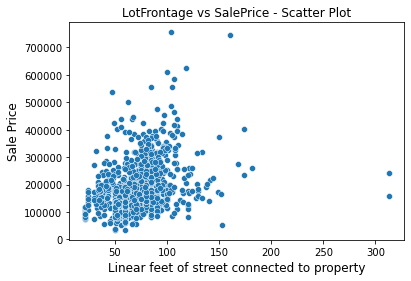

In [24]:
# Scatter Plot of column LotFrontage
sns.scatterplot(x = 'LotFrontage', y = 'SalePrice', data = hpp_df)
plt.xlabel('Linear feet of street connected to property', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('LotFrontage vs SalePrice - Scatter Plot')
plt.show()

**Observation** : We can see LotFrontage have some relation with SalePrice, eventhough the spread is less as price increases. Hence mostly it won't help in predicting SalePrice.
Thus imputing LotFrontage with either median or predicting its value using linear regression with some independent variable is not required.
In conclusion, we can will fill missing values as zero.

In [25]:
# Impute NA in LotFrontage column as 0
hpp_df['LotFrontage'].fillna(0, inplace=True)

In [26]:
# Convert following columns to integer type
list_of_columns = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
hpp_df[list_of_columns] = hpp_df[list_of_columns].astype('int64')

#### Deriving new columns

In [27]:
# Calculate age of house when it was sold. Since houses was remodeled, age of house = year sold - year remodeled
# In case houses were remodelled after it was sold off, age of house = year sold - year built
hpp_df['Property Age'] = np.where(hpp_df['YrSold'] >= hpp_df['YearRemodAdd'], hpp_df['YrSold'] - hpp_df['YearRemodAdd'], hpp_df['YrSold'] - hpp_df['YearBuilt'])

# Remove following columns as it is not required anymore. Note we are ignoring month at which house was sold, since it 
# will not have any value in calculating age of property
list_of_columns = ['YearBuilt', 'YrSold', 'YearRemodAdd', 'MoSold']
hpp_df.drop(labels = list_of_columns, axis = 1, inplace = True)

In [28]:
# Description of the 'Property Age' column
hpp_df['Property Age'].describe()

count    1460.00
mean       22.95
std        20.64
min         0.00
25%         4.00
50%        14.00
75%        41.00
max        60.00
Name: Property Age, dtype: float64

In [29]:
# 'int_rate' column can be divided 4 buckets
hpp_df['Age Bucket'] = pd.cut(hpp_df['Property Age'], 
                                    np.arange(0, 61, 10), # bins : min is 0 and max is 60
                                    labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60'], # bucket labels
                                    include_lowest = True)

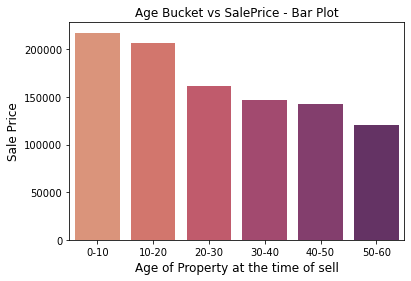

In [30]:
sns.barplot(x = 'Age Bucket', y = 'SalePrice', data = hpp_df, ci = None, palette = "flare")
plt.xlabel('Age of Property at the time of sell', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Age Bucket vs SalePrice - Bar Plot')
plt.show()

**Observation** : Seems SalePrice is more if the property age value is within 10 years. And also we can see a gradual decline in SalePrice as age of property increases. Hence this means, 'Property Age' would be negatively correlated with SalePrice.

In [31]:
# Check the shape of the dataframe
print('The data set now have {0} rows and {1} columns'.format(hpp_df.shape[0], hpp_df.shape[1]))

The data set now have 1460 rows and 78 columns


In [32]:
# Check the percentile and min-max of numerical variables.
hpp_df.describe(percentiles=[.1, .25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Property Age
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,57.62,10516.83,103.12,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,1868.74,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,180921.20,22.95
std,34.66,9981.26,180.73,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,453.70,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,79442.50,20.64
min,0.00,1300.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34900.00,0.00
10%,0.00,5000.00,0.00,0.00,0.00,74.90,636.90,756.90,0.00,0.00,912.00,1928.00,240.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,106475.00,1.00
25%,42.00,7553.50,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,1958.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,129975.00,4.00
50%,63.00,9478.50,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,1977.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,163000.00,14.00
75%,79.00,11601.50,164.25,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,2001.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,214000.00,41.00
90%,92.00,14381.70,335.00,1065.50,117.20,1232.00,1602.20,1680.00,954.20,0.00,2158.30,2006.00,757.10,262.00,130.00,112.00,0.00,0.00,0.00,0.00,278000.00,56.00
95%,104.00,17401.15,456.00,1274.00,396.20,1468.00,1753.00,1831.25,1141.05,0.00,2466.10,2007.00,850.10,335.00,175.05,180.15,0.00,160.00,0.00,0.00,326100.00,58.00


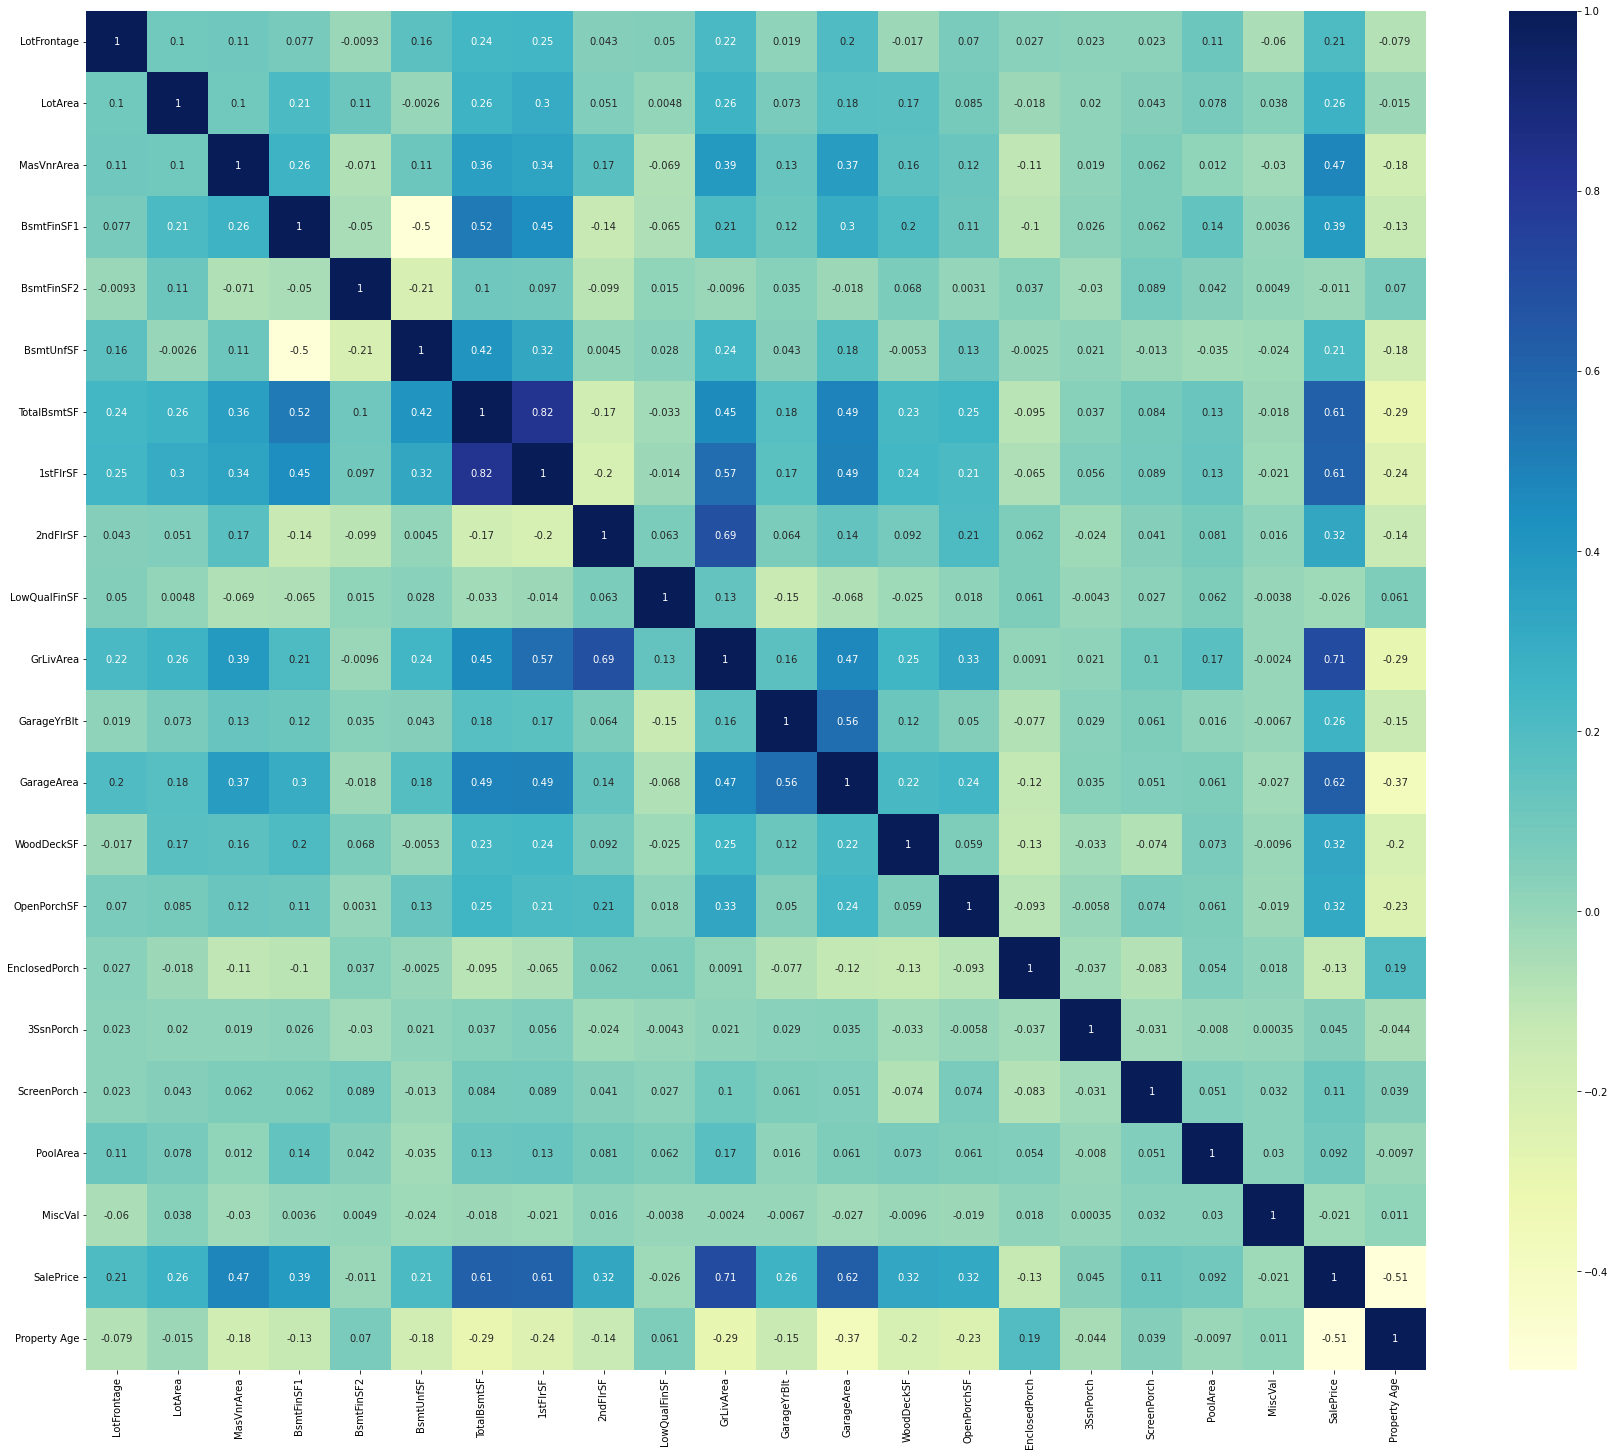

In [33]:
# List of Numeric type variables
list_of_columns = hpp_df.select_dtypes(include='int64').columns

# Plotting correlations on a heatmap
corr_matrix = hpp_df[list_of_columns].corr()
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [34]:
# Remove 'Property Age' column as we will focus more on 'Age Bucket'
hpp_df.drop(labels = 'Property Age', axis = 1, inplace = True)

**Visualising Numerical Variables**

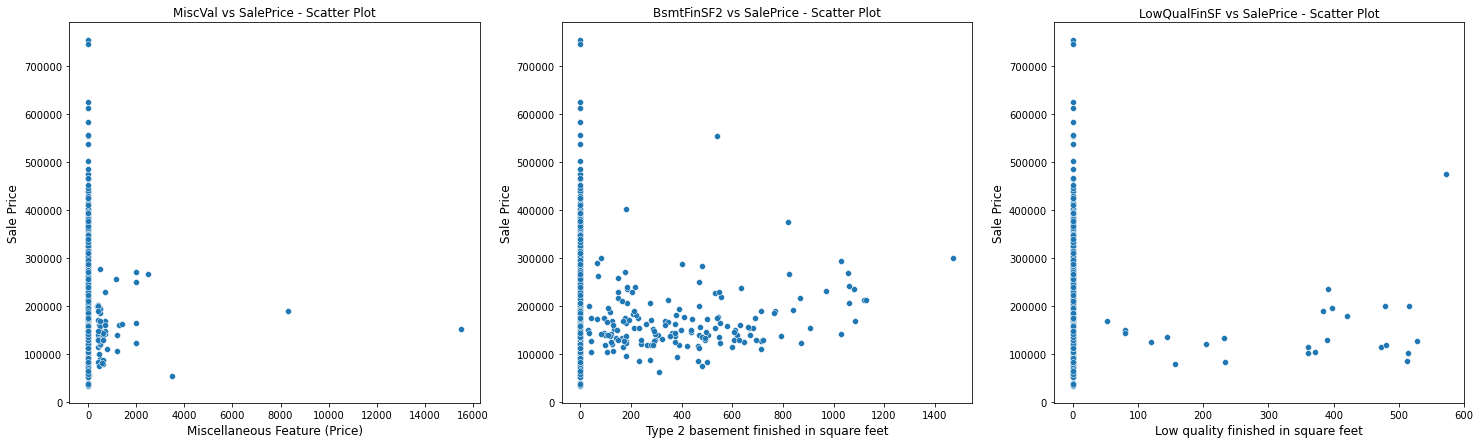

In [35]:
# List of features which have low correlation with SalePrice (-0.05 < correlation < 0.05)
list_of_columns = ['MiscVal', 'BsmtFinSF2', 'LowQualFinSF']

# Subplot - 1 rows and 3 columns
fig, axes = plt.subplots(1, 3)

# Scatter Plot of column OverallCond
sns.scatterplot(x = 'MiscVal', y = 'SalePrice', data = hpp_df, ax = axes[0])
axes[0].set_xlabel('Miscellaneous Feature (Price)', fontsize = 12)
axes[0].set_ylabel('Sale Price', fontsize = 12)
axes[0].set_title('MiscVal vs SalePrice - Scatter Plot')

# Scatter Plot of column BsmtFinSF2
sns.scatterplot(x = 'BsmtFinSF2', y = 'SalePrice', data = hpp_df, ax = axes[1])
axes[1].set_xlabel('Type 2 basement finished in square feet', fontsize = 12)
axes[1].set_ylabel('Sale Price', fontsize = 12)
axes[1].set_title('BsmtFinSF2 vs SalePrice - Scatter Plot')

# Scatter Plot of column LowQualFinSF
sns.scatterplot(x = 'LowQualFinSF', y = 'SalePrice', data = hpp_df, ax = axes[2])
axes[2].set_xlabel('Low quality finished in square feet', fontsize = 12)
axes[2].set_ylabel('Sale Price', fontsize = 12)
axes[2].set_title('LowQualFinSF vs SalePrice - Scatter Plot')

fig.set_size_inches(25, 7, forward = True)
plt.show()

**Observation** : We can see that the scatter spread is not that much with increasing sale price and all values lies mostly in zero. Most likely, this feature is unimportant for prediction.

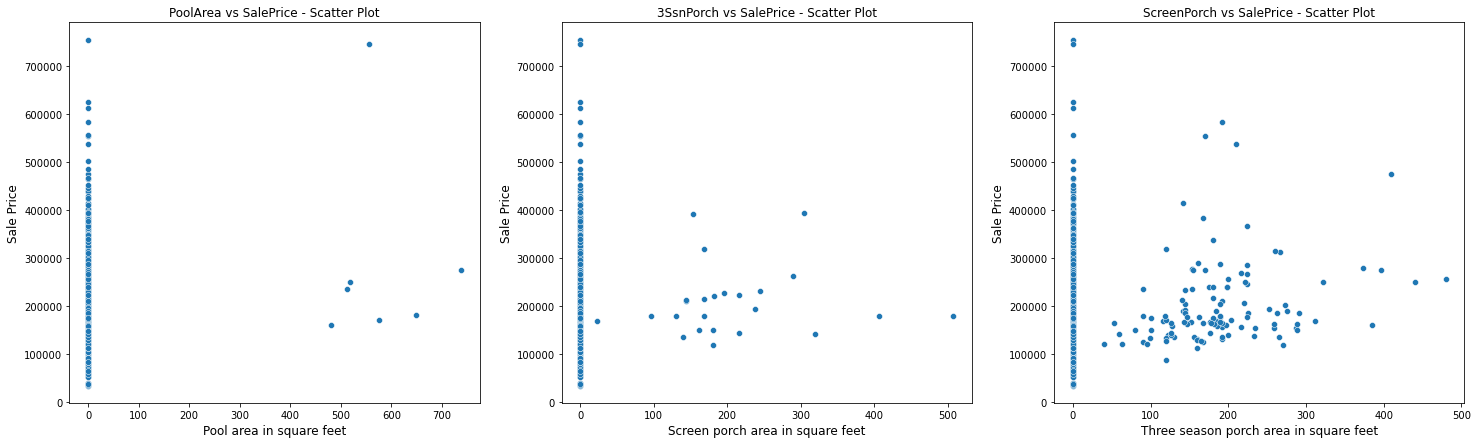

In [36]:
# List of features which have 0 value till 90th percentile
list_of_columns = ['PoolArea', '3SsnPorch', 'ScreenPorch']

# Subplot - 1 rows and 3 columns
fig, axes = plt.subplots(1, 3)

# Scatter Plot of column PoolArea
sns.scatterplot(x = 'PoolArea', y = 'SalePrice', data = hpp_df, ax = axes[0])
axes[0].set_xlabel('Pool area in square feet', fontsize = 12)
axes[0].set_ylabel('Sale Price', fontsize = 12)
axes[0].set_title('PoolArea vs SalePrice - Scatter Plot')

# Scatter Plot of column 3SsnPorch
sns.scatterplot(x = '3SsnPorch', y = 'SalePrice', data = hpp_df, ax = axes[1])
axes[1].set_xlabel('Screen porch area in square feet', fontsize = 12)
axes[1].set_ylabel('Sale Price', fontsize = 12)
axes[1].set_title('3SsnPorch vs SalePrice - Scatter Plot')

# Scatter Plot of column ScreenPorch
sns.scatterplot(x = 'ScreenPorch', y = 'SalePrice', data = hpp_df, ax = axes[2])
axes[2].set_xlabel('Three season porch area in square feet', fontsize = 12)
axes[2].set_ylabel('Sale Price', fontsize = 12)
axes[2].set_title('ScreenPorch vs SalePrice - Scatter Plot')

fig.set_size_inches(25, 7, forward = True)
plt.show()

**Observation** : We can see that the scatter spread is not that much with increasing sale price and all values lies mostly in zero. Most likely, this feature is unimportant for prediction.

In [37]:
# Function to plot Box plot and Distribution plot
def box_dist_plot(df, col):
    # Create Sub Plot
    fig, axes = plt.subplots(1, 2)
    
    # Box Plot of feature before removing outlier
    sns.boxplot(y = df[col], ax = axes[0])
    axes[0].set_title('Box Plot of {}'.format(col))
    axes[0].set_ylabel('Percentile Count')
    
    # Distribution Plot of column annual_inc
    sns.distplot(df[col], ax = axes[1])
    axes[1].set_xlabel('{}'.format(col), fontsize = 12)
    axes[1].set_title('Distribution Plot of {}'.format(col))

    fig.set_size_inches(20, 7, forward = True)
    plt.show()
    
# Function to remove outliers below 2 percentiles given as argument
def delete_outliers(df, col, lp, hp):
    # Percentile calculations
    Q1 = df[col].quantile(lp)
    Q3 = df[col].quantile(hp)
    IQR = Q3 - Q1
    Lower_Limit = Q1 - (1.5 * IQR)
    Upper_Limit = Q3 + (1.5 * IQR)

    # Remove outliers
    df = df[(df[col] >= Lower_Limit) & (df[col] <= Upper_Limit)]
    
    # Check the shape of the dataframe
    print('The data set now have {0} rows and {1} columns'.format(df.shape[0], df.shape[1]))
    
    # Return data frame to update it
    return df

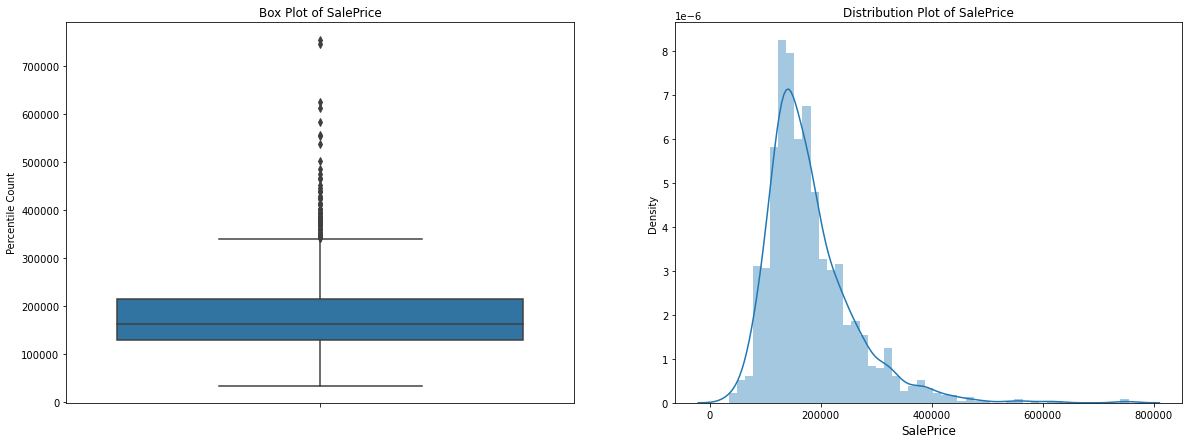

In [38]:
# Plot Box plot and Distribution plot of feature SalePrice
box_dist_plot(hpp_df, 'SalePrice')

**Observation** : We can see some extreme outliers above 700000. Let's see the row entries of these in data set. And also we can see some positive skewness.

In [39]:
# Display all SalePrice row entries where it is greater than or equal to 700000
hpp_df[hpp_df['SalePrice'] >= 700000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Age Bucket
691,60,RL,104,21535,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,No Pool,No Fence,No Additional Features,0,WD,Normal,755000,10-20
1182,60,RL,160,15623,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,Hip,CompShg,Wd Sdng,ImStucc,None,0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,No Additional Features,0,WD,Abnorml,745000,10-20


**Observation** : SaleCondition is different for these 2 features and we can see that OverallQual, ExterQual etc. are top for these sales. So these data entries are important as well, hence we can't delete these outliers.

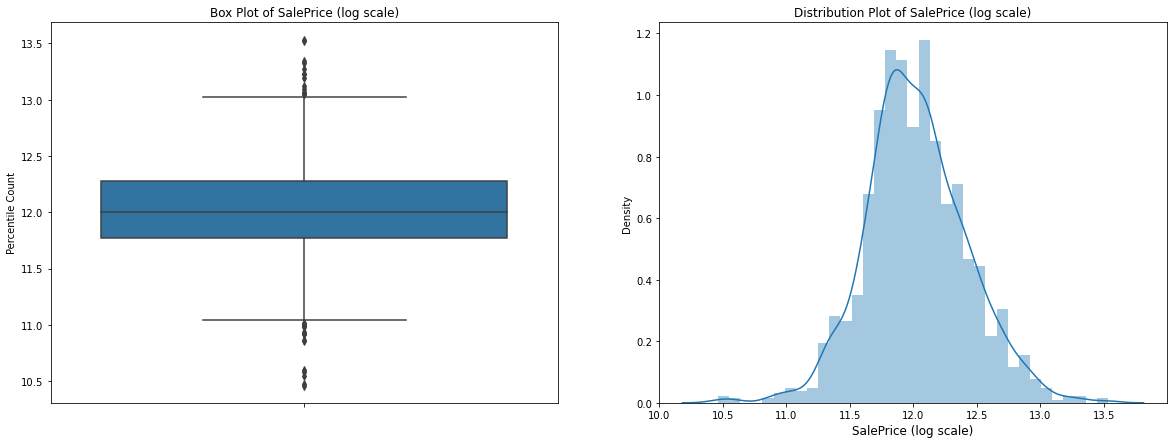

In [40]:
# Let's create a column for log transformed 'SalePrice'
#hpp_df['SalePrice (log scale)'] = np.log(hpp_df['SalePrice'])
temp_df = np.log(hpp_df['SalePrice']).to_frame()
temp_df.rename(columns = {'SalePrice':'SalePrice (log scale)'}, inplace = True)

# Plot Box plot and Distribution plot of feature SalePrice
box_dist_plot(temp_df, 'SalePrice (log scale)')

**Observation** : Positive skewness is removed by using log transformation.

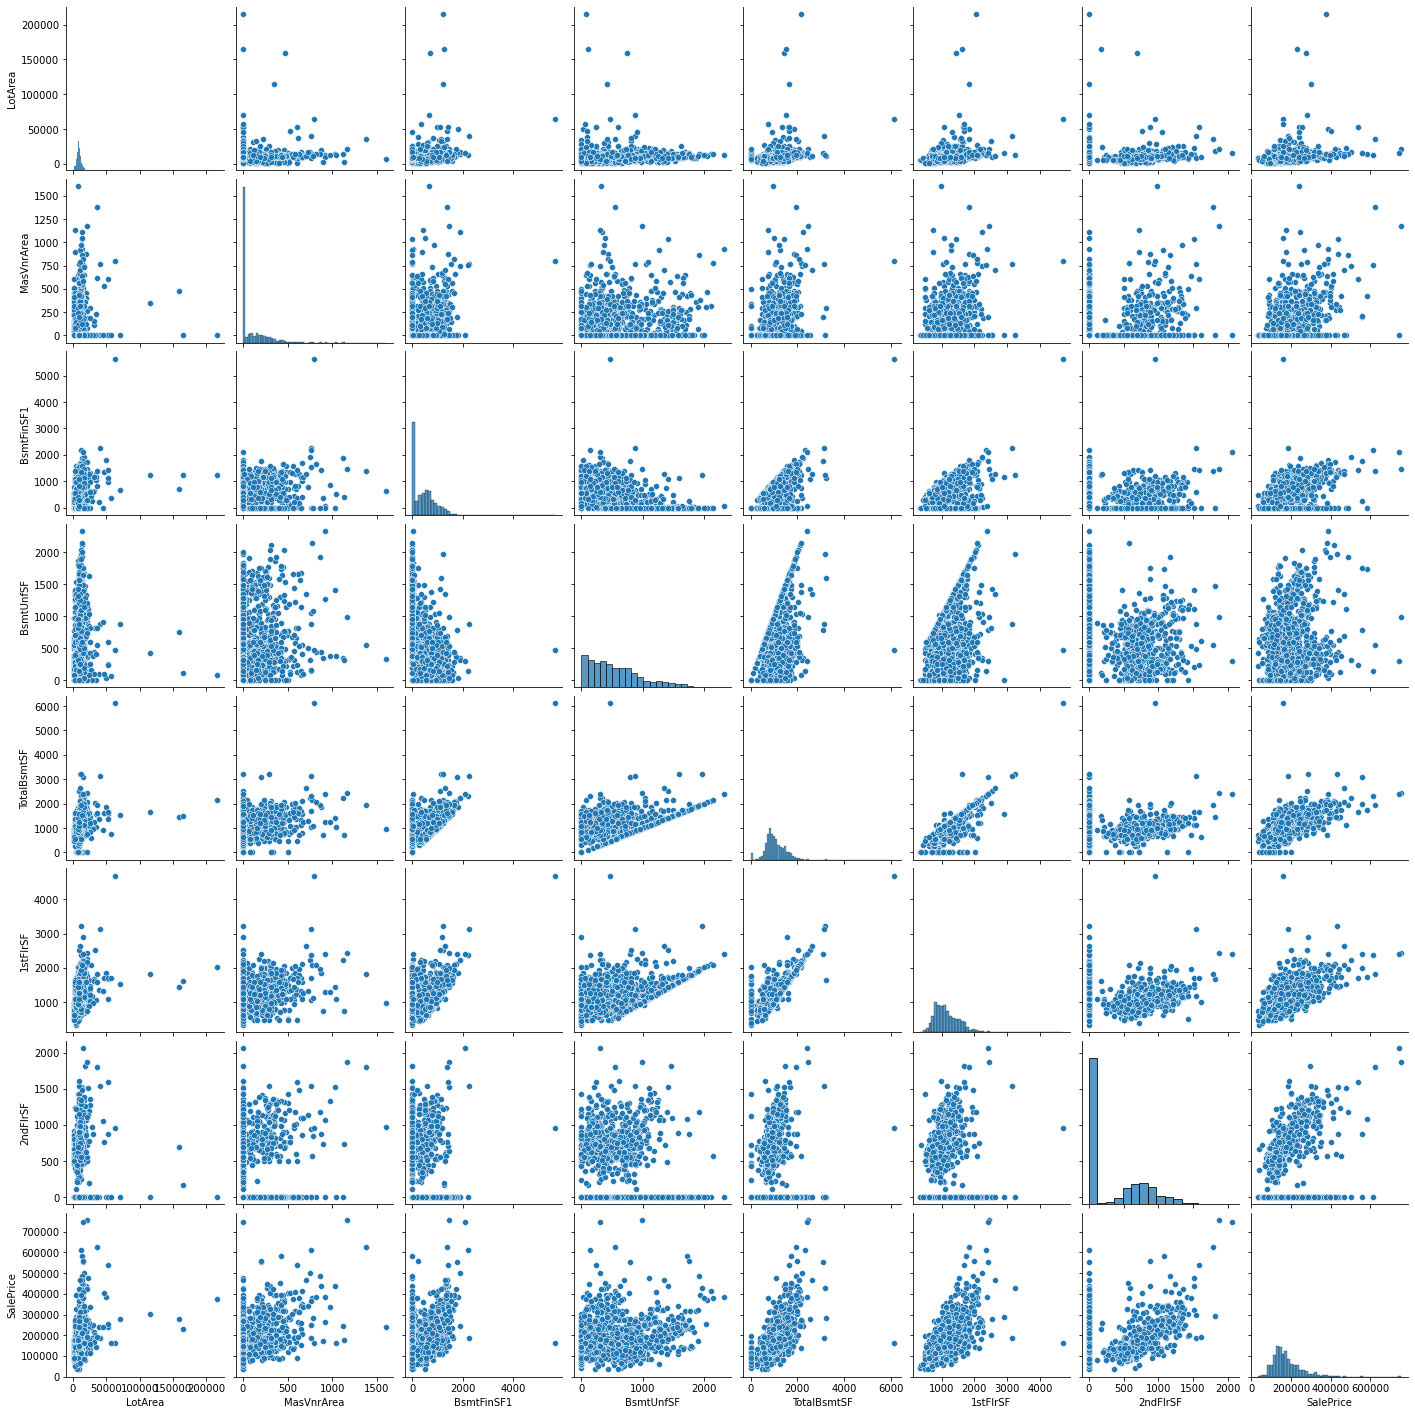

In [41]:
# Do Pair Plot of following features
list_of_columns = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']

sns.pairplot(hpp_df[list_of_columns])
plt.show()

**Observation**

1) We can clearly see 'TotalBsmtSF' and '1stFlrSF' have strong relation with 'SalePrice' and also they are also highly correlated.

2) '2ndFlrSF' feature is slightly related to 'SalePrice' but it is strongly correlated to 'GrLivArea'.

3) 'MasVnrArea' looks is slightly related to 'SalePrice'.

4) 'LotArea' and 'BsmtFinSF1' have less spread.

5) 'BsmtUnfSF' feature have more spread in lower part of 'SalePrice' and it decreases with increase 'SalePrice'.

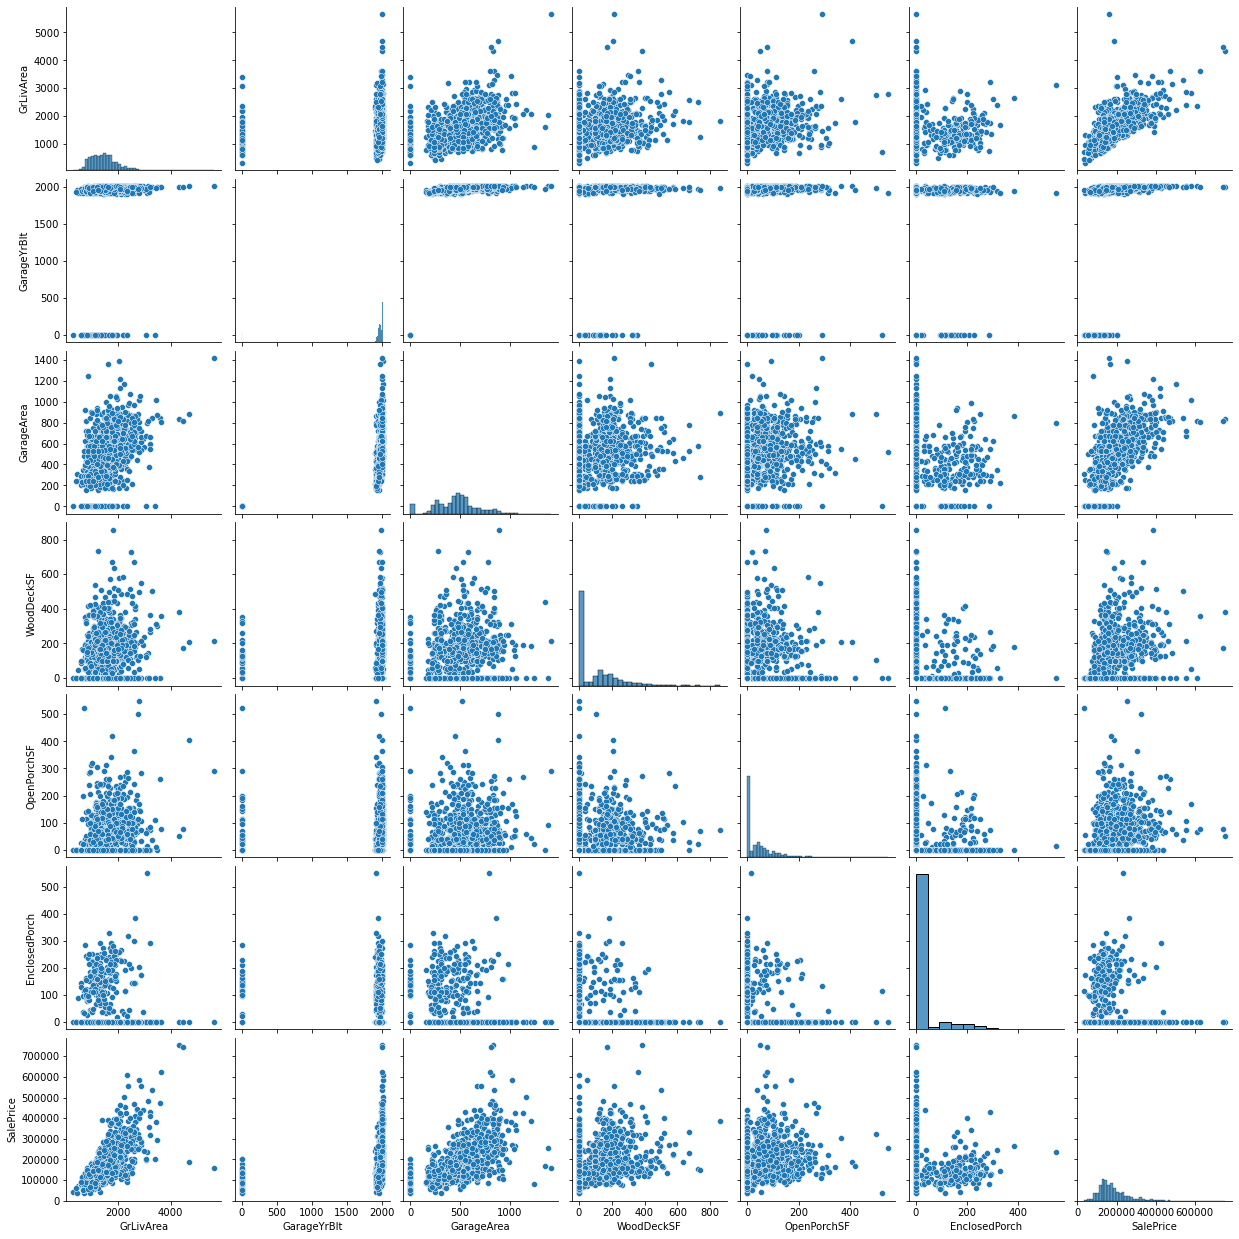

In [42]:
# Do Pair Plot of following features
list_of_columns = ['GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice']

sns.pairplot(hpp_df[list_of_columns])
plt.show()

**Observation**

1) 'GarageYrBlt' is more concentrated on year 2000 region.

2) 'GrLivArea' and 'GarageArea' are strongly related to 'SalePrice' as spread is increasing in linear relationship.

3) 'WoodDeckSF' and 'OpenPorchSF' are good with spread wise but we can see some level of data points lying on zero.

4) 'EnclosedPorch' have more data points lying on zero and have some spread in lower part of 'SalePrice'

5) 'Property Age' is negatively correlated with 'SalePrice'. We can see the spread going down with increase in 'SalePrice'.

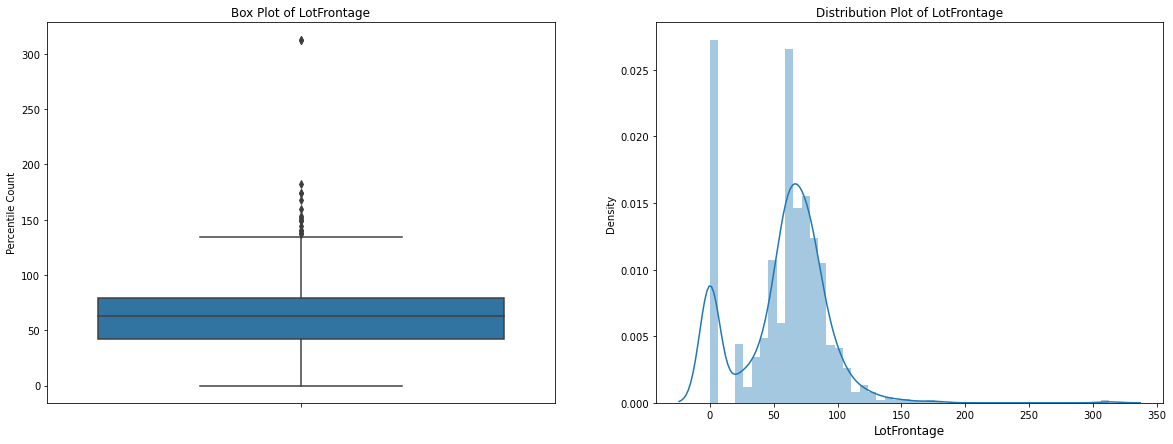

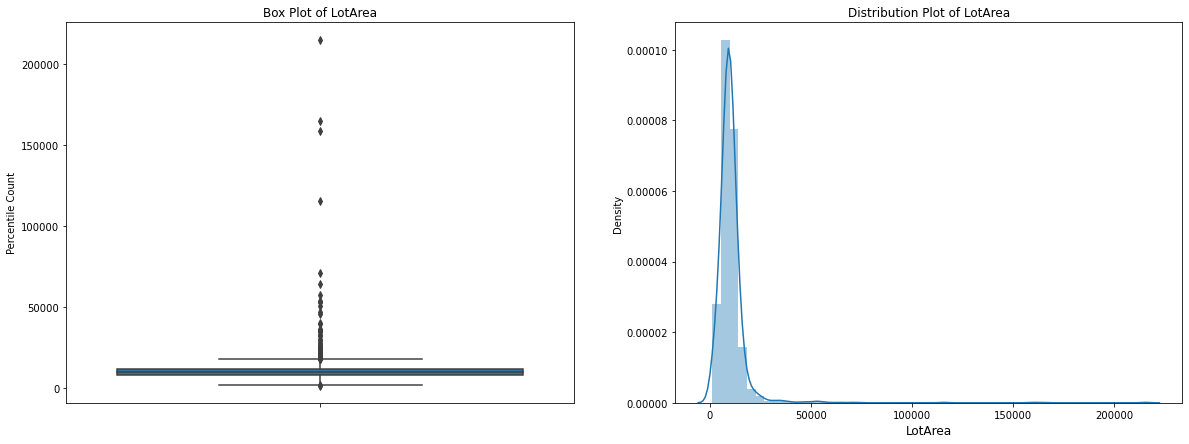

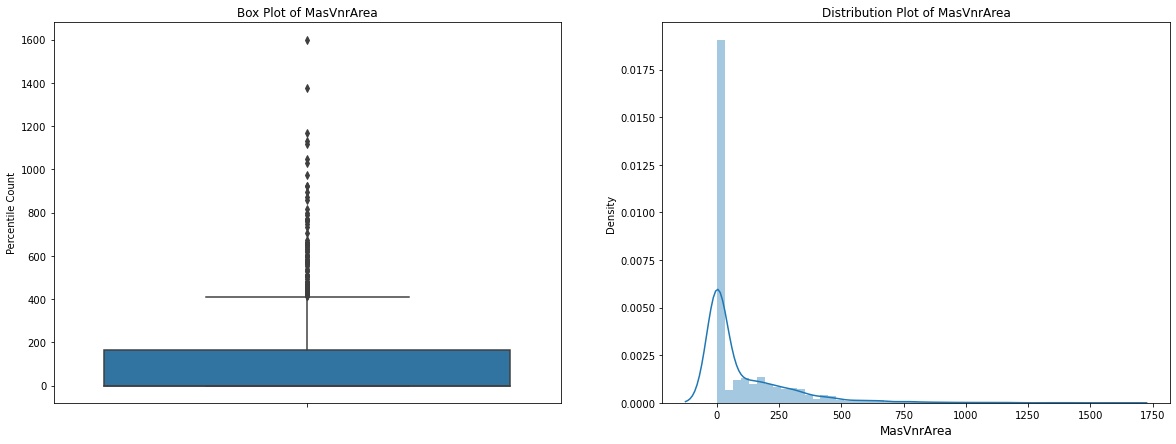

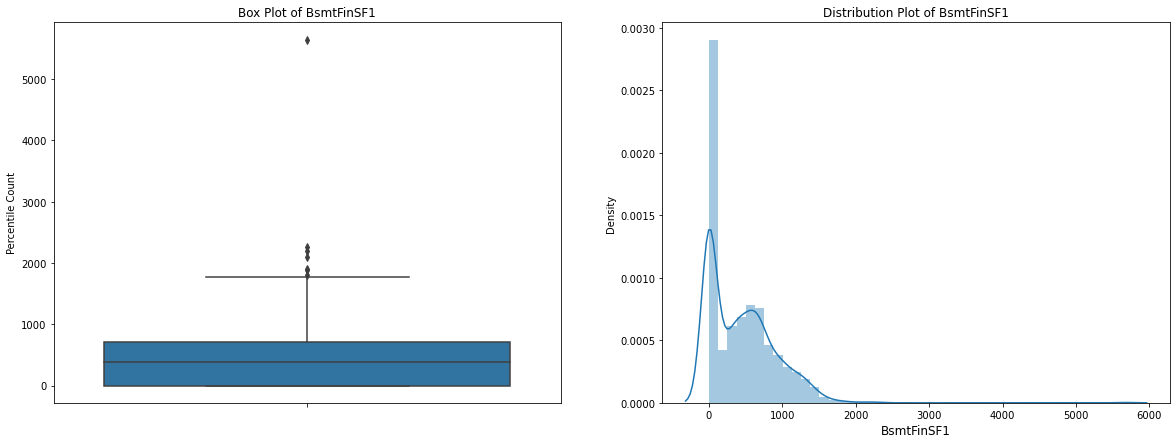

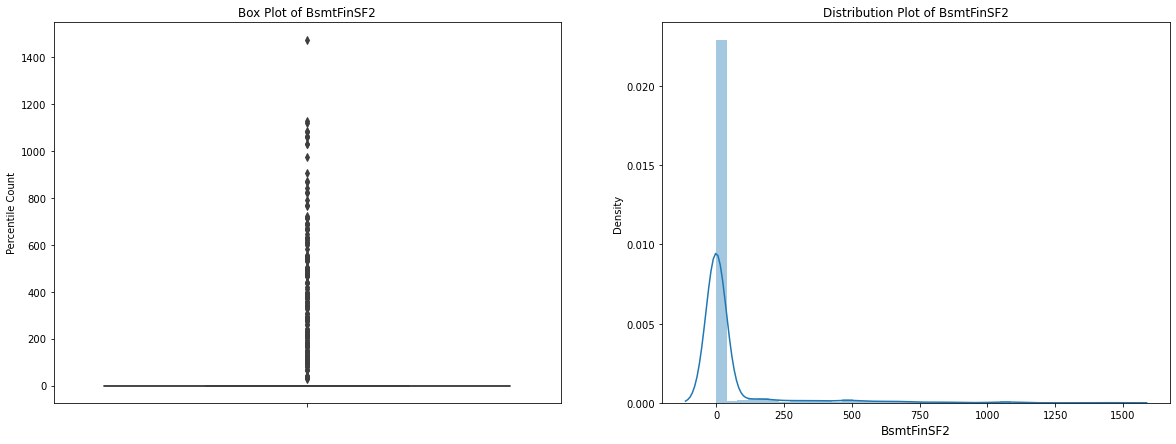

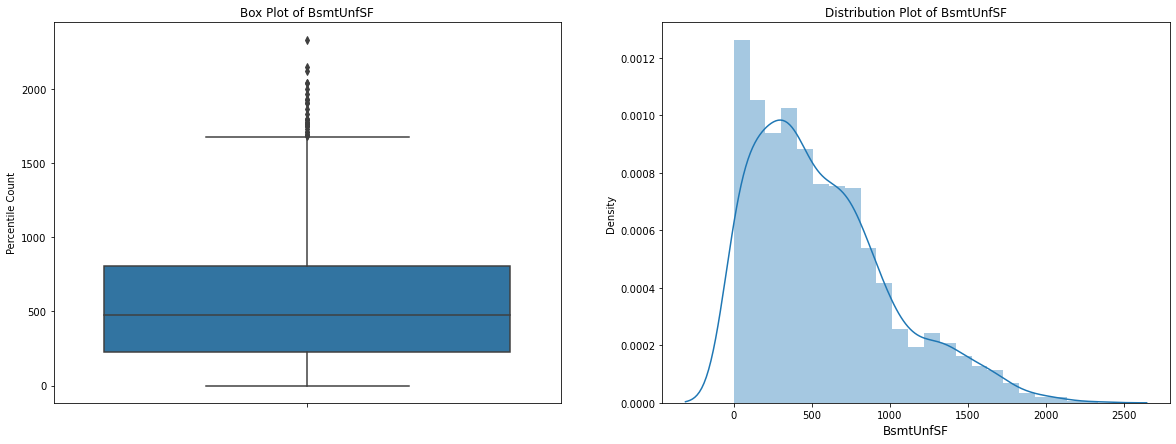

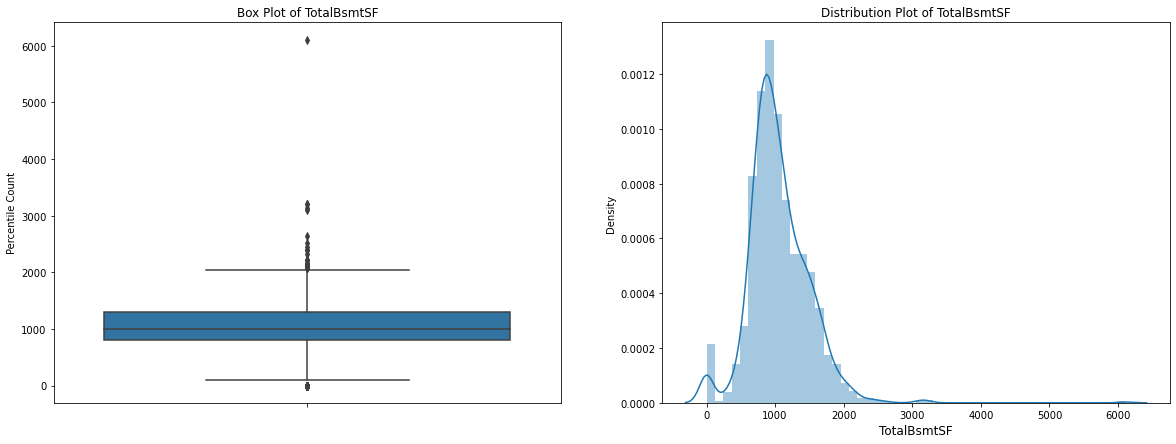

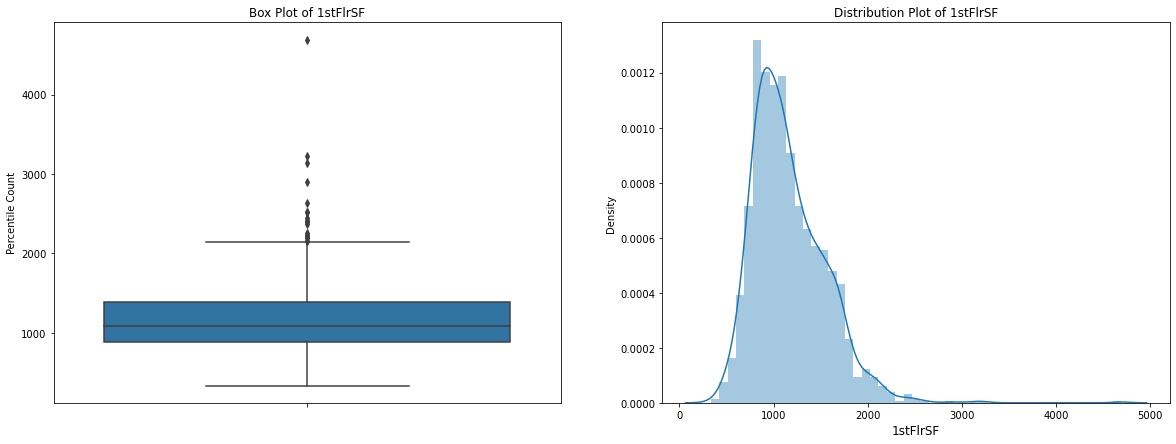

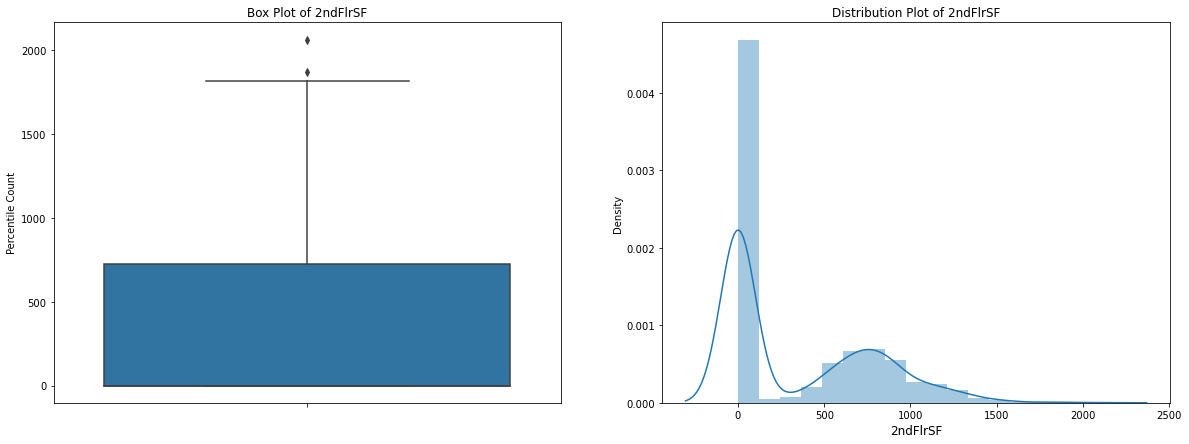

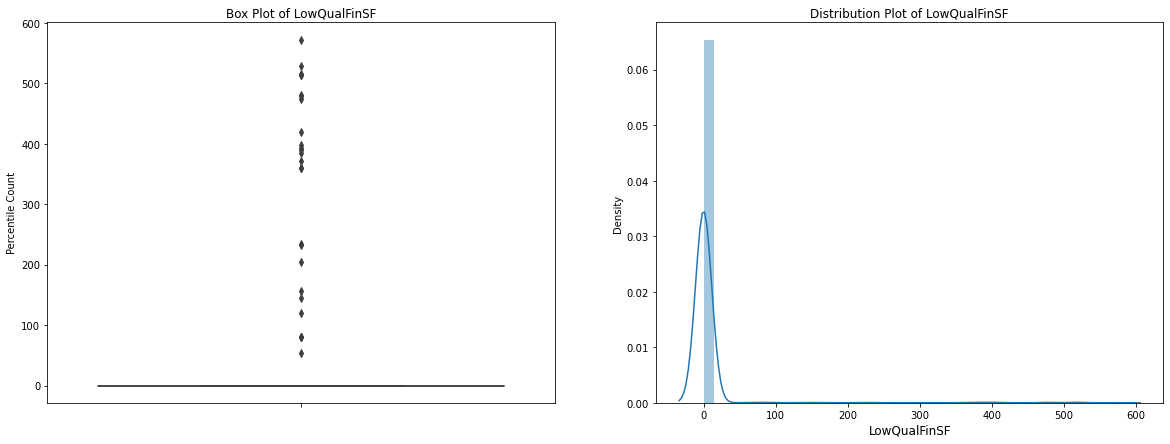

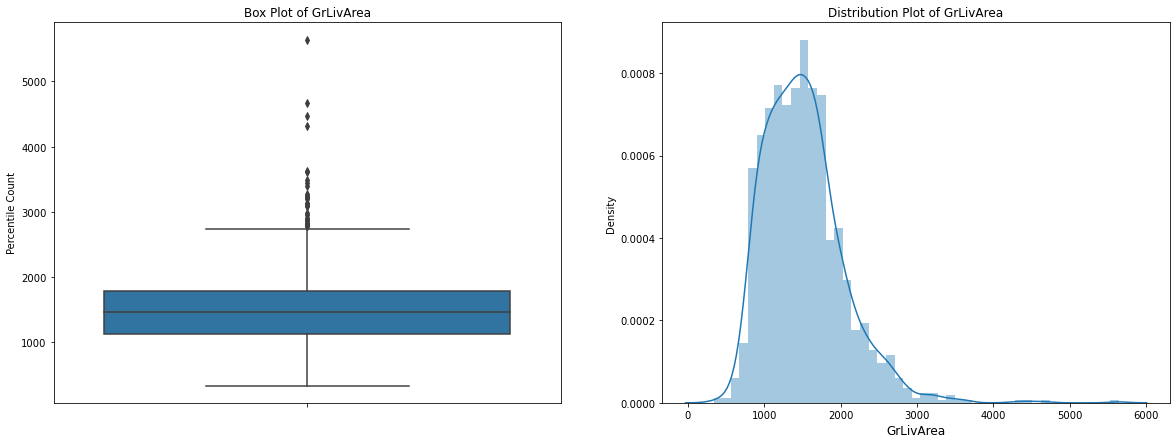

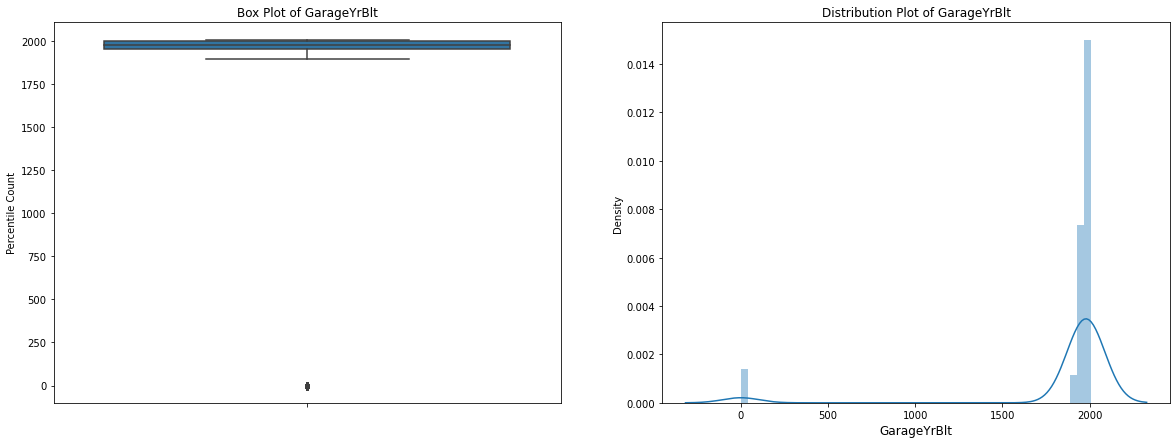

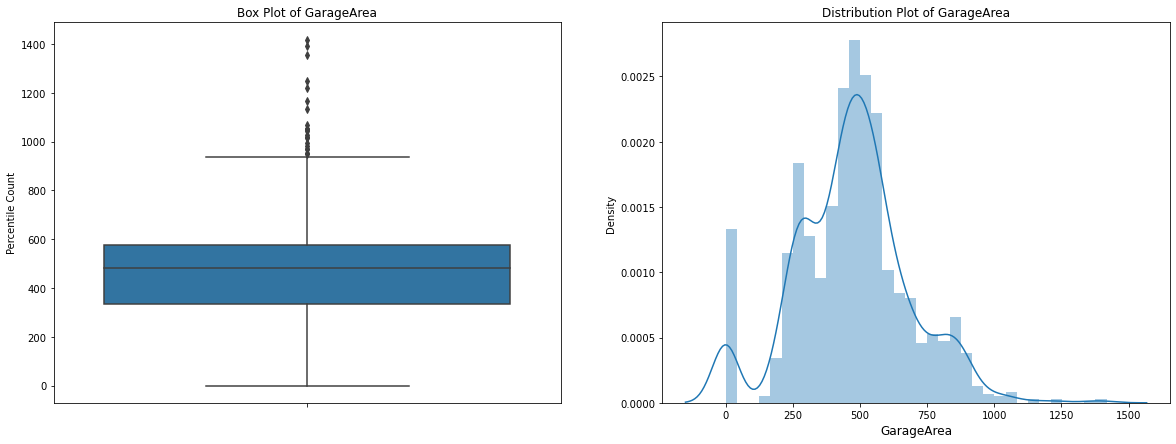

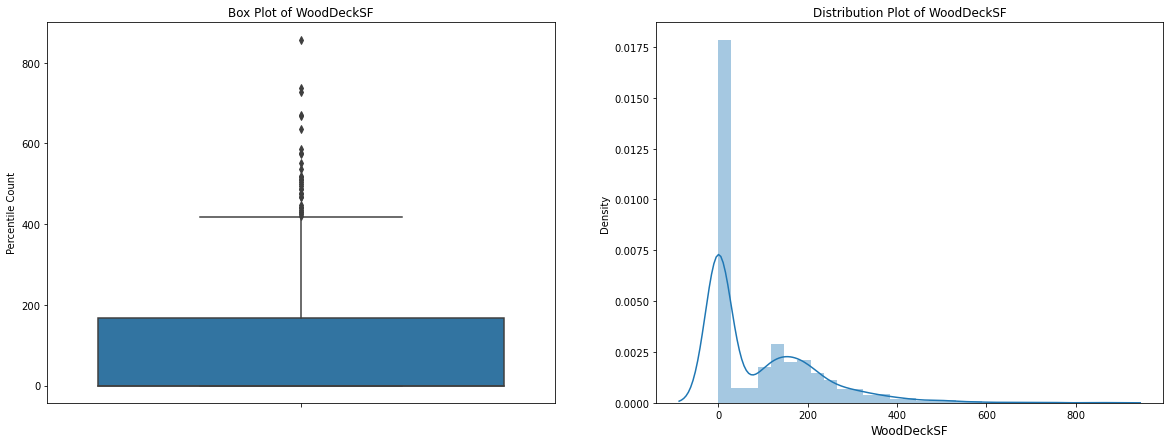

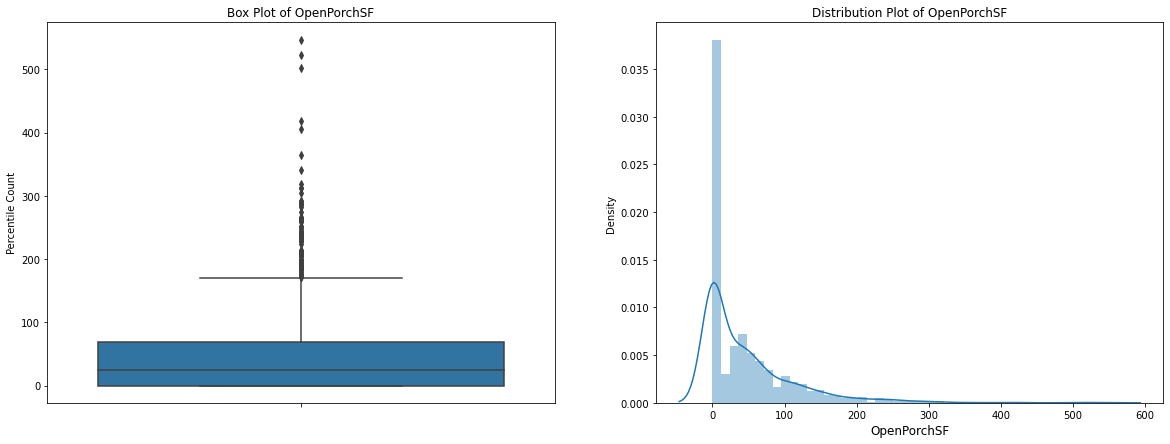

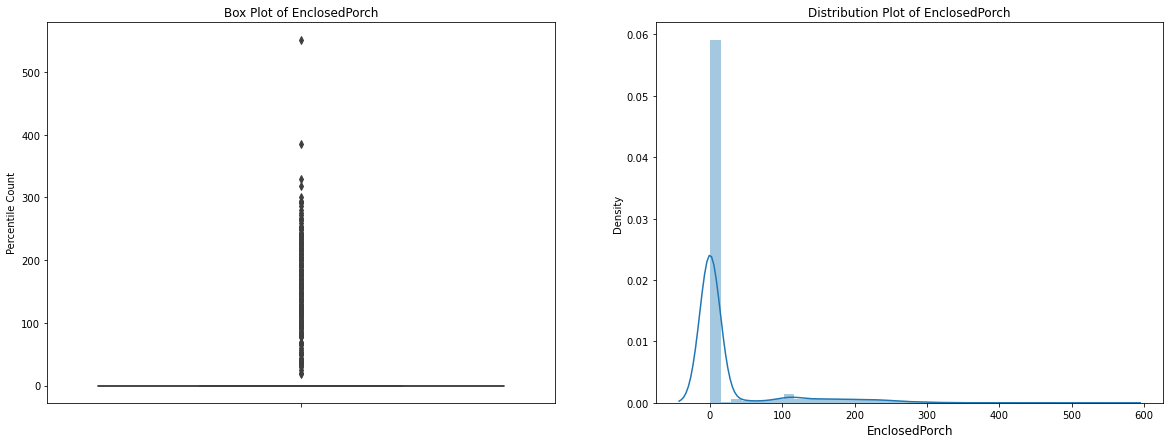

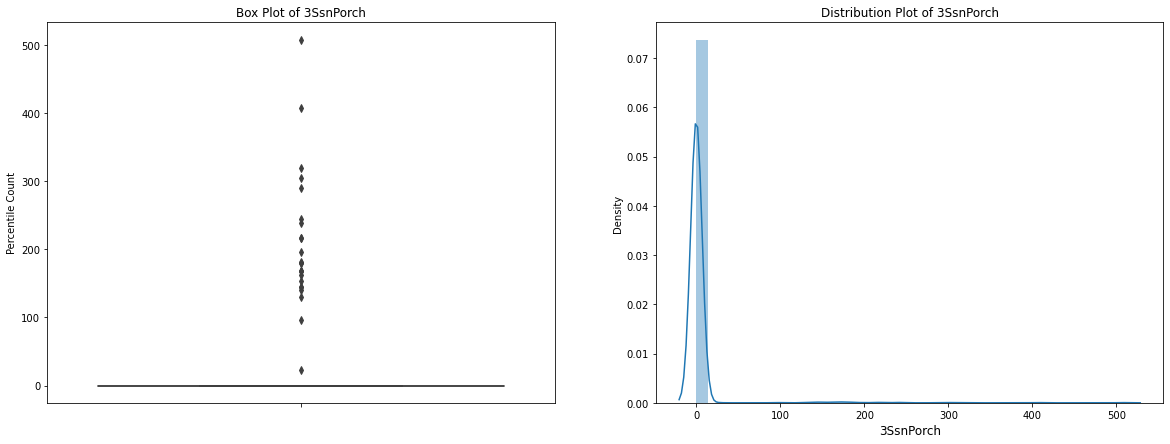

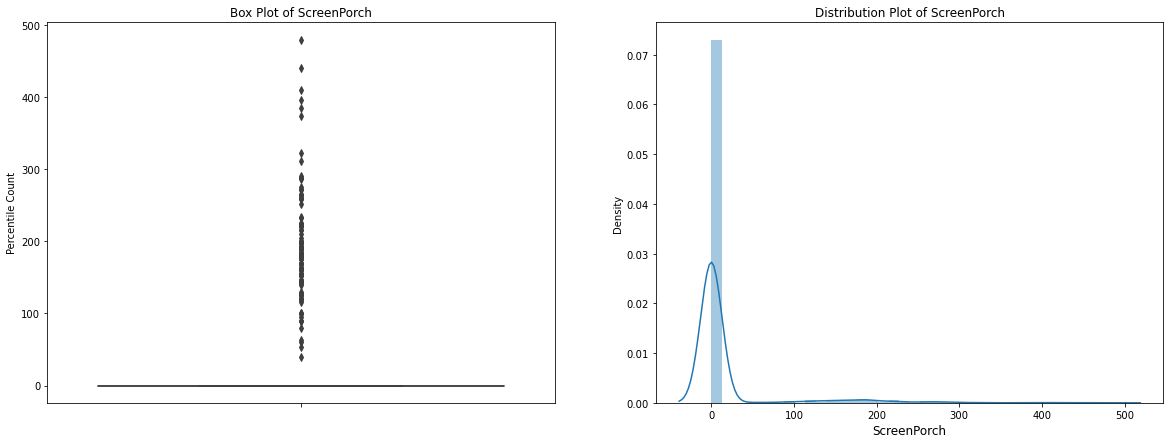

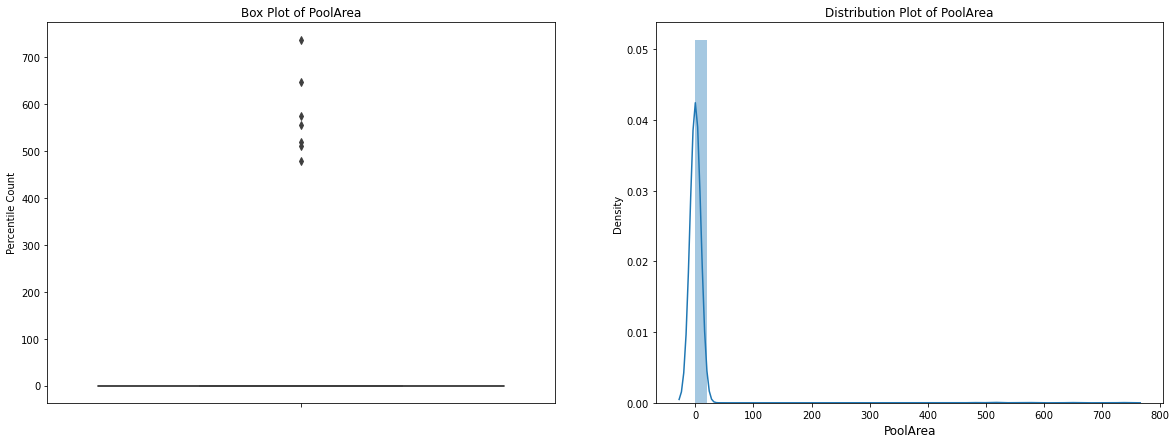

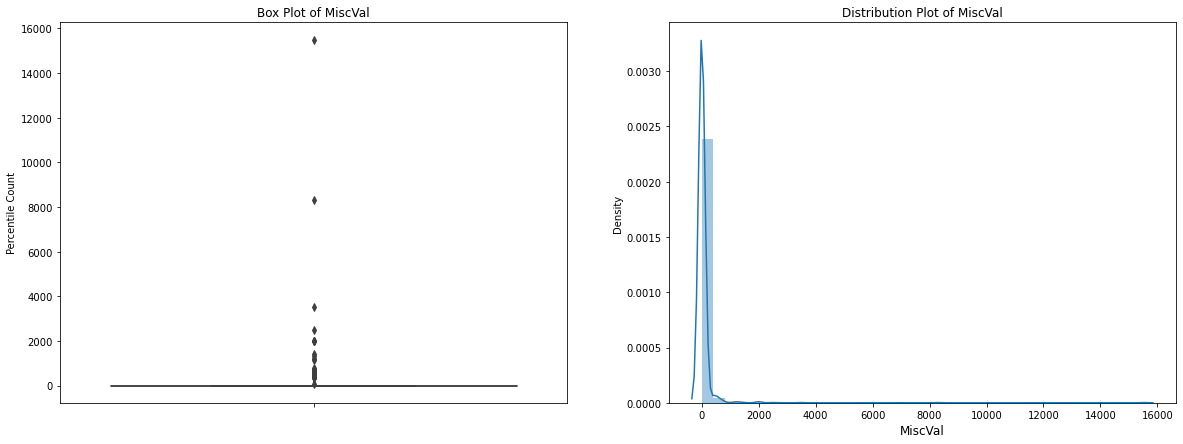

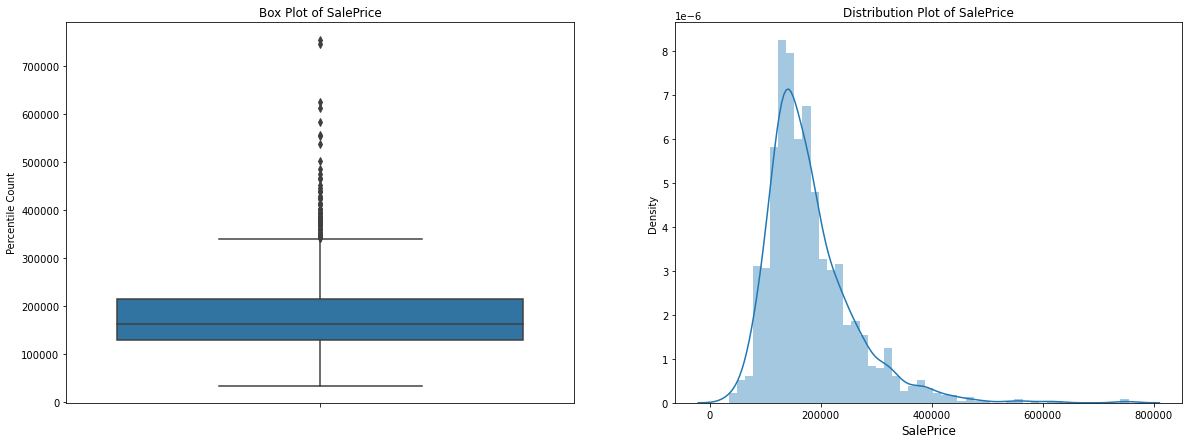

In [43]:
# List of Numeric type variables
list_of_columns = hpp_df.select_dtypes(include='int64').columns

for col in list_of_columns:
    box_dist_plot(hpp_df, col)

**Observation** : All numeric data is heavily positve skewed. This can affect model prediction. Hence let's convert all these variables to log transformed

In [44]:
# List of Numeric type variables
numeric_columns = hpp_df.select_dtypes(include='int64').columns

**Visualising Categorical Variables**

Since there are more categorical variables, visualizing all features can be difficult. Easy way is to plot most important categorical variables that defines the idea 'what makes a house sell itself'.
Selected variables are Overall House structure, Utilities, Kitchen Quality, Heating Condition, Fence etc. We will plot only these variables and rest of the categorical variables will analyzed using correlation matrix after converting them to numerical data.

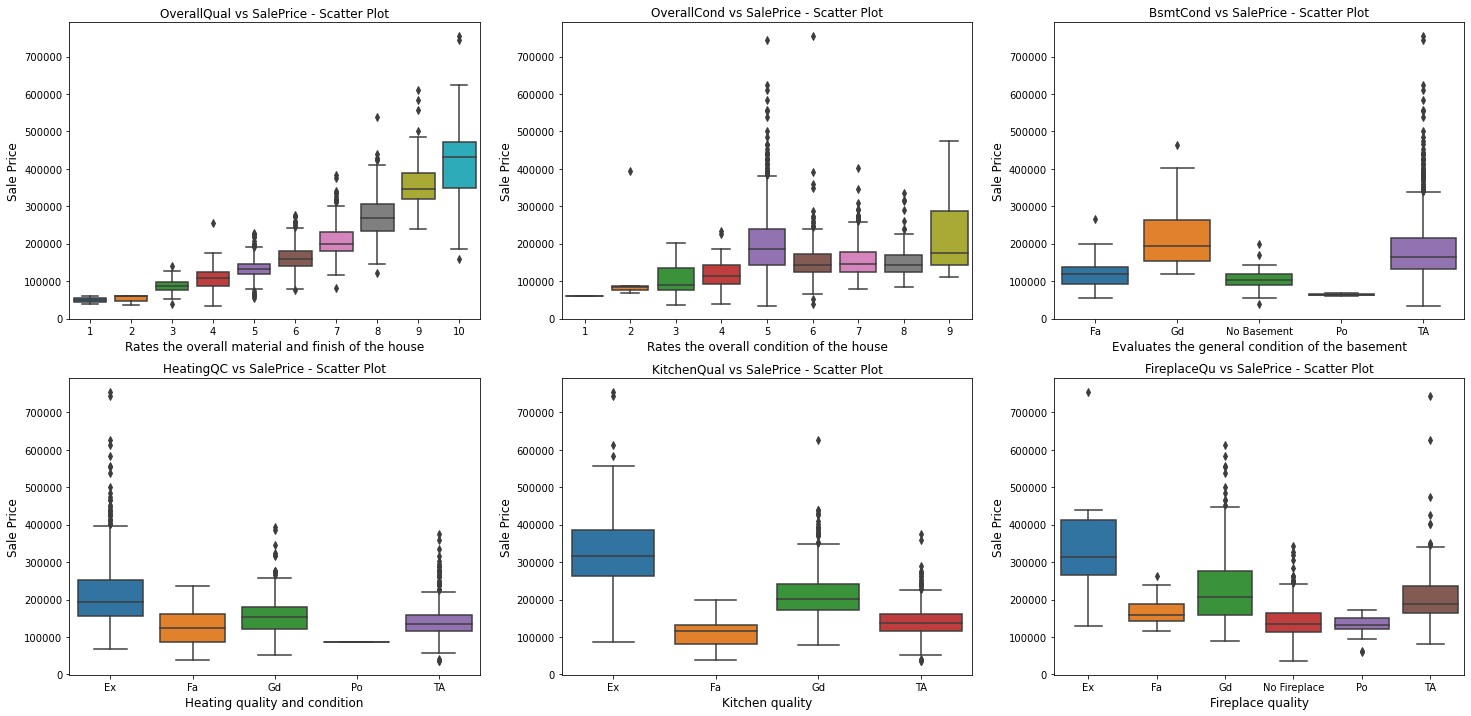

In [45]:
# Subplot - 2 rows and 3 columns
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (25, 12))

# Box Plot of column 'OverallQual'
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = hpp_df, ax = axes[0][0])
axes[0][0].set_xlabel('Rates the overall material and finish of the house', fontsize = 12)
axes[0][0].set_ylabel('Sale Price', fontsize = 12)
axes[0][0].set_title('OverallQual vs SalePrice - Scatter Plot')

# Box Plot of column 'OverallCond'
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = hpp_df, ax = axes[0][1])
axes[0][1].set_xlabel('Rates the overall condition of the house', fontsize = 12)
axes[0][1].set_ylabel('Sale Price', fontsize = 12)
axes[0][1].set_title('OverallCond vs SalePrice - Scatter Plot')

# Box Plot of column 'BsmtCond'
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = hpp_df, ax = axes[0][2])
axes[0][2].set_xlabel('Evaluates the general condition of the basement', fontsize = 12)
axes[0][2].set_ylabel('Sale Price', fontsize = 12)
axes[0][2].set_title('BsmtCond vs SalePrice - Scatter Plot')

# Box Plot of column 'HeatingQC'
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = hpp_df, ax = axes[1][0])
axes[1][0].set_xlabel('Heating quality and condition', fontsize = 12)
axes[1][0].set_ylabel('Sale Price', fontsize = 12)
axes[1][0].set_title('HeatingQC vs SalePrice - Scatter Plot')

# Box Plot of column 'KitchenQual'
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = hpp_df, ax = axes[1][1])
axes[1][1].set_xlabel('Kitchen quality', fontsize = 12)
axes[1][1].set_ylabel('Sale Price', fontsize = 12)
axes[1][1].set_title('KitchenQual vs SalePrice - Scatter Plot')

# Box Plot of column 'FireplaceQu'
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = hpp_df, ax = axes[1][2])
axes[1][2].set_xlabel('Fireplace quality', fontsize = 12)
axes[1][2].set_ylabel('Sale Price', fontsize = 12)
axes[1][2].set_title('FireplaceQu vs SalePrice - Scatter Plot')

plt.show()

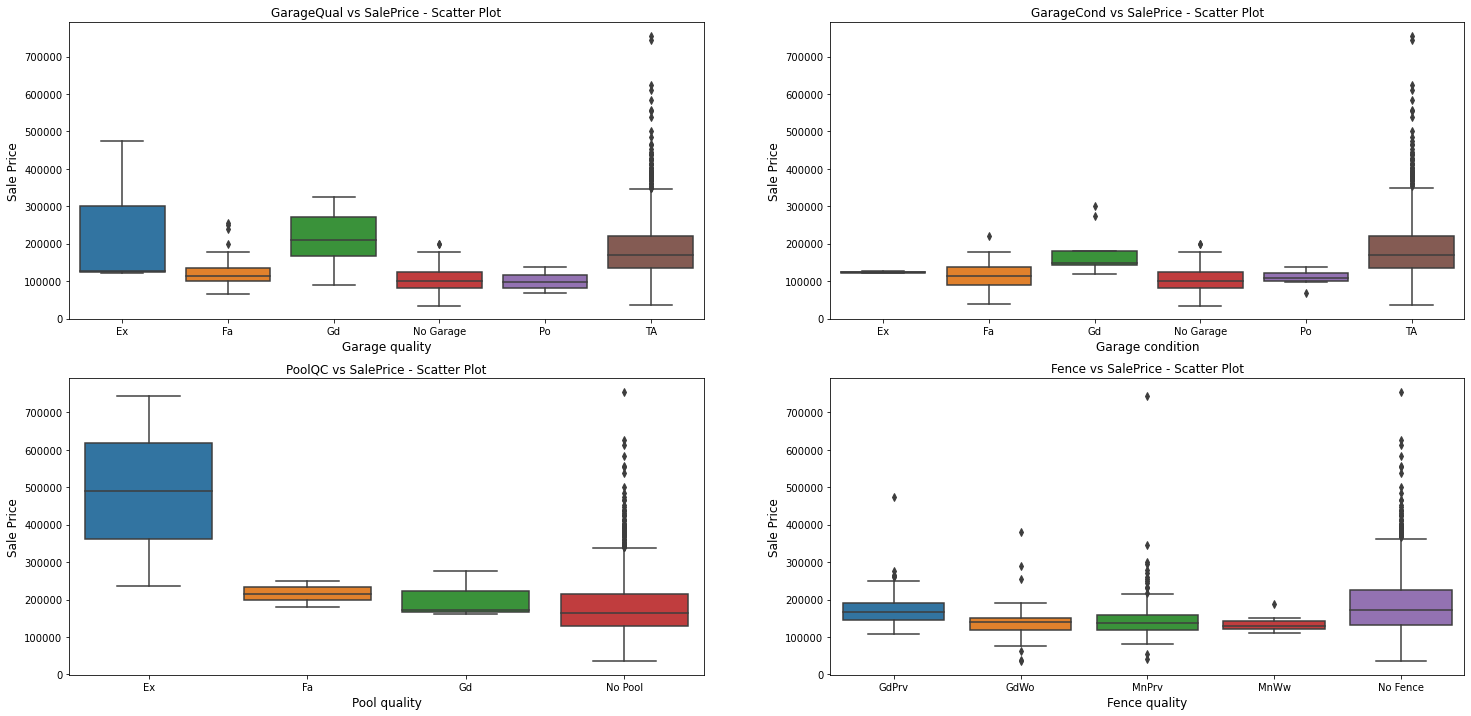

In [46]:
# Subplot - 2 rows and 2 columns
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 12))

# Box Plot of column 'GarageQual'
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = hpp_df, ax = axes[0][0])
axes[0][0].set_xlabel('Garage quality', fontsize = 12)
axes[0][0].set_ylabel('Sale Price', fontsize = 12)
axes[0][0].set_title('GarageQual vs SalePrice - Scatter Plot')

# Box Plot of column 'GarageCond'
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = hpp_df, ax = axes[0][1])
axes[0][1].set_xlabel('Garage condition', fontsize = 12)
axes[0][1].set_ylabel('Sale Price', fontsize = 12)
axes[0][1].set_title('GarageCond vs SalePrice - Scatter Plot')

# Box Plot of column 'PoolQC'
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = hpp_df, ax = axes[1][0])
axes[1][0].set_xlabel('Pool quality', fontsize = 12)
axes[1][0].set_ylabel('Sale Price', fontsize = 12)
axes[1][0].set_title('PoolQC vs SalePrice - Scatter Plot')

# Box Plot of column 'Fence'
sns.boxplot(x = 'Fence', y = 'SalePrice', data = hpp_df, ax = axes[1][1])
axes[1][1].set_xlabel('Fence quality', fontsize = 12)
axes[1][1].set_ylabel('Sale Price', fontsize = 12)
axes[1][1].set_title('Fence vs SalePrice - Scatter Plot')

plt.show()

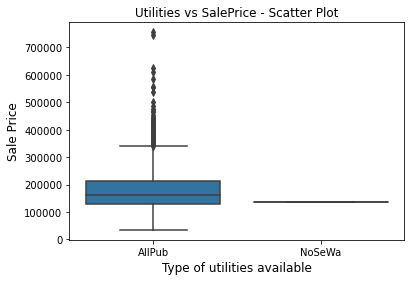

In [47]:
# Box Plot of column 'Utilities'
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = hpp_df)
plt.xlabel('Type of utilities available', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Utilities vs SalePrice - Scatter Plot')
plt.show()

In [48]:
# Save categorical features column names
category_columns = hpp_df.select_dtypes(include='category').columns

In [49]:
# Convert LotShape feature to numerical rank
temp_dict = {'Reg' : 3, 'IR1' : 2, 'IR2' : 1, 'IR3' : 0}
hpp_df['LotShape'] = hpp_df['LotShape'].map(temp_dict).astype('int64')

In [50]:
# Convert following features to numerical rank
temp_dict = {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1, 'Po' : 0}
list_of_columns = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']
for col in list_of_columns:
    hpp_df[col] = hpp_df[col].map(temp_dict)
    hpp_df[col] = hpp_df[col].astype('int64')

In [51]:
# Convert following features to numerical rank
temp_dict = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'No Basement' : 0, 'No Fireplace' : 0, 'No Garage' : 0}
list_of_columns = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
for col in list_of_columns:
    hpp_df[col] = hpp_df[col].map(temp_dict)
    hpp_df[col] = hpp_df[col].astype('int64')

In [52]:
# Convert LotShape feature to numerical rank
temp_dict = {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'No Basement' : 0}
hpp_df['BsmtExposure'] = hpp_df['BsmtExposure'].map(temp_dict).astype('int64')

In [53]:
# Convert GarageFinish feature to numerical rank
temp_dict = {'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'No Garage' : 0}
hpp_df['GarageFinish'] = hpp_df['GarageFinish'].map(temp_dict).astype('int64')

In [54]:
# Convert following features to numerical rank
temp_dict = {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1, 'No Pool' : 0}
hpp_df['PoolQC'] = hpp_df['PoolQC'].map(temp_dict).astype('int64')

In [55]:
# Convert following features to numerical rank
list_of_columns = ['OverallQual', 'OverallCond']
for col in list_of_columns:
    hpp_df[col] = hpp_df[col].astype('int64')

In [56]:
# Convert following features to numerical rank
temp_dict = {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'No Basement' : 0}
list_of_columns = ['BsmtFinType1', 'BsmtFinType2']
for col in list_of_columns:
    hpp_df[col] = hpp_df[col].map(temp_dict)
    hpp_df[col] = hpp_df[col].astype('int64')

In [57]:
category_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
       'Age Bucket'],
      dtype='object')

In [58]:
# Create dummy for following categorical variable
# Store it in a new data frame - 'dummy_df'.
list_of_columns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                   'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                   'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
                   'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                   'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
                   'SaleCondition', 'Age Bucket']

dummy_df = pd.get_dummies(hpp_df[list_of_columns], drop_first = True)

# Save column names of dummy
dummy_columns = dummy_df.columns

# Check how 'dummy_df' data frame looks like
dummy_df.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Additional Features,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age Bucket_10-20,Age Bucket_20-30,Age Bucket_30-40,Age Bucket_40-50,Age Bucket_50-60
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0

In [59]:
# Check size of dummy dataframe
print('Dummy dataframe have {0} rows and {1} columns'.format(dummy_df.shape[0], dummy_df.shape[1]))

Dummy dataframe have 1460 rows and 218 columns


In [60]:
# Add the dummy dataframe  to the original House Price Predition dataframe
hpp_df = pd.concat([hpp_df, dummy_df], axis = 1)

# Now let's see the first 5 rows of House Price Predition dataframe.
hpp_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Age Bucket,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PavedDrive_P,Pa

In [61]:
# Do Log data transformation and remove original columns
for col in numeric_columns:
    hpp_df[col+' (log scale)'] = np.log(hpp_df[col] + 1)
    hpp_df.drop(col, axis = 1, inplace = True)

In [62]:
# Drop following columns as we have created the dummies for it
list_of_columns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                   'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                   'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
                   'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                   'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
                   'SaleCondition', 'Age Bucket']

# Remove columns
hpp_df.drop(labels = list_of_columns, axis = 1, inplace = True)

# Now let's see the first 5 rows of House Price Predition dataframe.
hpp_df.head()

,LotShape,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Additional Features,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age Bucket_10-20,Age Bucket_20-30,Age Bucket_30-40,Age Bucket_40-50,Age Bucket_50-60,LotFrontage (log scale),LotArea (log scale),MasVnrArea (log scale),BsmtFinSF1 (log scale),BsmtFinSF2 (log scale),BsmtUnfSF (log scale),TotalBsmtSF (log scale),1stFlrSF (log scale),2ndFlrSF (log

In [63]:
# Check the shape of the dataframe
print('The data set now have {0} rows and {1} columns'.format(hpp_df.shape[0], hpp_df.shape[1]))

The data set now have 1460 rows and 256 columns


In [64]:
# Check the percentile and min-max of numerical variables.
hpp_df.describe()

,LotShape,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Additional Features,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age Bucket_10-20,Age Bucket_20-30,Age Bucket_30-40,Age Bucket_40-50,Age Bucket_50-60,LotFrontage (log scale),LotArea (log scale),MasVnrArea (log scale),BsmtFinSF1 (log scale),BsmtFinSF2 (log scale),BsmtUnfSF (log scale),TotalBsmtSF (log scale),1stFlrSF (log scale),2ndFlrSF (log

### Splitting the Data into Training and Testing Sets

In [65]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(hpp_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [66]:
# Check the size of train and test dataframe
print("Train dataframe have {0} Rows and {1} Columns".format(df_train.shape[0], df_train.shape[1]))
print("Test dataframe have {0} Rows and {1} Columns".format(df_test.shape[0], df_test.shape[1]))

Train dataframe have 1021 Rows and 256 Columns
Test dataframe have 438 Rows and 256 Columns


#### Rescaling the Features

Some columns have large values, hence we need to rescale the variables so that they have a comparable scale with other variables. We will use MinMax scaling.

In [67]:
# Call API
scaler = MinMaxScaler()

# Apply scaler() to all variables other than dummy variables
list_of_columns = df_train.drop(labels = dummy_columns, axis = 1).columns

# Use fit to learn scaler parameters (max, min) of train dataset and apply it to transform the dataset
df_train[list_of_columns] = scaler.fit_transform(df_train[list_of_columns])

# Use transform method to use same scalar parameters used in train data and also we don't want to learn anything from 
# test data.
df_test[list_of_columns] = scaler.transform(df_test[list_of_columns])

In [68]:
# See first 5 rows of train dataframe
df_train.head()

,LotShape,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Additional Features,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age Bucket_10-20,Age Bucket_20-30,Age Bucket_30-40,Age Bucket_40-50,Age Bucket_50-60,LotFrontage (log scale),LotArea (log scale),MasVnrArea (log scale),BsmtFinSF1 (log scale),BsmtFinSF2 (log scale),BsmtUnfSF (log scale),TotalBsmtSF (log scale),1stFlrSF (log scale),2ndFlrSF (log

In [69]:
# Get statistics of train dataframe
df_train.describe()

,LotShape,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Additional Features,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age Bucket_10-20,Age Bucket_20-30,Age Bucket_30-40,Age Bucket_40-50,Age Bucket_50-60,LotFrontage (log scale),LotArea (log scale),MasVnrArea (log scale),BsmtFinSF1 (log scale),BsmtFinSF2 (log scale),BsmtUnfSF (log scale),TotalBsmtSF (log scale),1stFlrSF (log scale),2ndFlrSF (log

In [70]:
# See first 5 rows of test dataframe
df_test.head()

,LotShape,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Additional Features,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age Bucket_10-20,Age Bucket_20-30,Age Bucket_30-40,Age Bucket_40-50,Age Bucket_50-60,LotFrontage (log scale),LotArea (log scale),MasVnrArea (log scale),BsmtFinSF1 (log scale),BsmtFinSF2 (log scale),BsmtUnfSF (log scale),TotalBsmtSF (log scale),1stFlrSF (log scale),2ndFlrSF (log

In [71]:
# Get statistics of test dataframe
df_test.describe()

,LotShape,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Additional Features,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age Bucket_10-20,Age Bucket_20-30,Age Bucket_30-40,Age Bucket_40-50,Age Bucket_50-60,LotFrontage (log scale),LotArea (log scale),MasVnrArea (log scale),BsmtFinSF1 (log scale),BsmtFinSF2 (log scale),BsmtUnfSF (log scale),TotalBsmtSF (log scale),1stFlrSF (log scale),2ndFlrSF (log

Now we have all variables of train data in the range 0 to 1. And also we have scaled test data based on scalar parameters from train data

### Building our model

#### Dividing into X and Y sets for the model building

In [72]:
# Pop 'SalePrice' column to get our target variable and store the rest of the variables in another dataframe
y_train = df_train.pop('SalePrice (log scale)')
X_train = df_train

In [73]:
# Pop 'SalePrice' column to get our target variable and store the rest of the variables in another dataframe
y_test = df_test.pop('SalePrice (log scale)')
X_test = df_test

#### Applying Linear Regression

Let's now try predicting house sale prices using linear regression.

In [74]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [75]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-33818917461.102108
[ 8.81929935e-03  1.12510448e-01  8.33357820e-02  1.58900152e-02
 -1.18497388e-02  3.75240629e-02 -7.42440954e-03  2.35464441e-02
  1.03710477e-02 -4.32064638e-03  6.18783092e-03  1.23933766e-02
  1.86825913e-02  8.39859068e-03  6.24451737e-02  5.23109793e-03
  1.13852884e-01 -3.63115990e-02 -8.92808860e-02 -6.96123907e-02
 -2.08075780e-02 -1.50287357e-02 -2.12564493e-02 -8.52644443e-02
 -1.27049149e-02 -1.67927599e-02 -9.83359540e+07  9.16892469e-03
 -1.83877649e-02  1.11954534e-02 -1.18281967e+09  1.56469057e-01
  1.43235886e-01  1.48999430e-01  1.40090432e-01  1.53549256e-02
  1.46344829e-02  2.38016151e-02  1.21897986e-04 -9.72521083e-03
  1.95156850e-03 -4.55707634e-02  3.52565543e-03 -1.46753749e-02
 -2.25767405e-02 -1.06770438e-03  7.24153588e-03 -9.34583265e-03
  3.93337141e-02 -8.89926692e-03  1.34812855e-02  5.35500810e-03
 -6.39612418e-03  3.01799048e-02 -2.64946373e-02 -6.07556607e-03
 -9.62871487e-03 -4.65063181e-02 -1.06856372e-02 -1.53277267e-02
 -2.8

In [76]:
def calculate_metrics(y_train, y_pred_train, y_test, y_pred_test):
    # Create an empty list
    metric = []
    
    # R-squared of train and test data
    r2_train = r2_score(y_train, y_pred_train)
    metric.append(r2_train)
    r2_test = r2_score(y_test, y_pred_test)
    metric.append(r2_test)
    print('R2 Score (Train) : {}'.format(r2_train))
    print('R2 Score (Test) : {}'.format(r2_test))

    # Residual Sum of Squares (RSS) of train and test data
    rss_train = np.sum(np.square(y_train - y_pred_train))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred_test))
    metric.append(rss_test)
    print('RSS (Train) : {}'.format(rss_train))
    print('RSS (Test) : {}'.format(rss_test))

    # Mean Squared Error (MSE) of train and test data
    mse_train = mean_squared_error(y_train, y_pred_train)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    metric.append(mse_test)
    print('MSE (Train) : {}'.format(mse_train))
    print('MSE (Test) : {}'.format(mse_test))

    # Root Mean Squared Error (RMSE) of train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print('RMSE (Train) : {}'.format(rmse_train))
    print('RMSE (Test) : {}'.format(rmse_test))
    
    return metric

In [77]:
# Predict SalePrice in train and test dataset for Linear Regression
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# Calculate metrics
metric_lr = calculate_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 Score (Train) : 0.9583989949076439
R2 Score (Test) : -3.9490215127512504e+18
RSS (Train) : 0.7064591358695147
RSS (Test) : 3.0113716340834497e+19
MSE (Train) : 0.0006919286345440888
MSE (Test) : 6.875277703386871e+16
RMSE (Train) : 0.026304536387172627
RMSE (Test) : 262207507.5848682


In [78]:
# Function to calculate the VIFs for each model
def generate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [79]:
# Calculate the VIFs for Linear Regression
generate_vif(X_train)

,Features,VIF
203,GarageCars_1,inf
87,BldgType_2fmCon,inf
202,GarageType_No Garage,inf
113,Exterior1st_CBlock,inf
26,MSSubClass_90,inf
...,...,...
146,Foundation_Wood,1.37
78,Condition1_RRNe,1.28
132,Exterior2nd_Other,NaN
155,Electrical_Mix,NaN


### Ridge and Lasso Regression

Let's now try predicting house sale prices for dataset used in simple linear regression, to perform ridge and lasso regression.

### Ridge Regression

In [80]:
# List of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
# Printing the best hyperparameter alpha
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 0.8}
-0.029582815203317424


In [82]:
# Fitting Ridge model for best hyperparameter alpha and printing coefficients which have been penalised
ridge_alpha = ridge_cv.best_params_['alpha']
ridge = Ridge(alpha = ridge_alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 7.44773466e-03  1.14465441e-01  7.43205614e-02  1.60914072e-02
 -8.35014096e-03  3.91851459e-02  6.57243167e-03  2.27343935e-02
  1.05189004e-02 -1.39365700e-03  8.93912038e-03  1.67431664e-02
  2.13745302e-02  1.39896635e-02  4.85290547e-02  6.53417254e-03
 -5.96913240e-05 -3.13507501e-02 -4.08270086e-02 -2.34208431e-02
 -1.36638446e-02 -2.32938267e-02 -1.53014646e-02 -3.50548495e-03
 -6.17002282e-03 -5.32849748e-03 -5.34535280e-03 -5.97166520e-03
 -3.15425986e-02  5.88898514e-04 -1.74836109e-02  7.52363788e-02
  7.16870990e-02  7.85075528e-02  7.30117925e-02  1.23215573e-02
  9.66394629e-03  1.95492817e-02  1.08964447e-02  2.98114168e-03
  1.18802064e-02 -2.53369793e-02  6.16133111e-03 -1.58729793e-02
 -2.12879767e-02 -2.87468311e-03  9.16862026e-03  1.61071790e-02
  9.99595880e-03 -1.06882942e-02  7.25419425e-03  2.19576437e-02
  1.14903116e-03  3.11518862e-02 -2.85829969e-02 -3.59931435e-03
 -2.50196192e-02 -4.28554055e-02 -9.70002493e-03 -9.11012792e-03
  3.13444375e-03 -9.15542

In [83]:
ridge_cv_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.69e-03,1.37e-03,3.21e-03,3.93e-03,0.0,{'alpha': 0.0001},-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,6.92e-04,20,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,3.65e-04
1,6.53e-03,7.80e-03,3.13e-04,6.25e-04,0.0,{'alpha': 0.001},-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,4.97e-04,18,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,3.89e-04
2,6.65e-03,6.58e-03,3.12e-03,6.25e-03,0.01,{'alpha': 0.01},-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,6.52e-04,15,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,4.01e-04
3,9.26e-03,3.38e-03,3.20e-03,3.92e-03,0.05,{'alpha': 0.05},-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,1.25e-03,13,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,4.48e-04
4,6.40e-03,7.84e-03,0.00e+00,0.00e+00,0.1,{'alpha': 0.1},-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,1.58e-03,11,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,4.95e-04
5,1.04e-02,8.64e-03,6.27e-03,7.68e-03,0.2,{'alpha': 0.2},-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,1.84e-03,10,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,5.78e-04
6,6.28e-03,7.69e-03,0.00e+00,0.00e+00,0.3,{'alpha': 0.3},-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,1.94e-03,8,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,6.26e-04
7,6.29e-03,7.71e-03,4.57e-03,5.90e-03,0.4,{'alpha': 0.4},-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,2.00e-03,7,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,6.61e-04
8,6.37e-03,7.80e-03,0.00e+00,0.00e+00,0.5,{'alpha': 0.5},-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,2.03e-03,6,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,6.82e-04
9,3.12e-03,6.25e-03,5.00e-03,6.43e-03,0.6,{'alpha': 0.6},-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,2.05e-03,4,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,6.93e-04


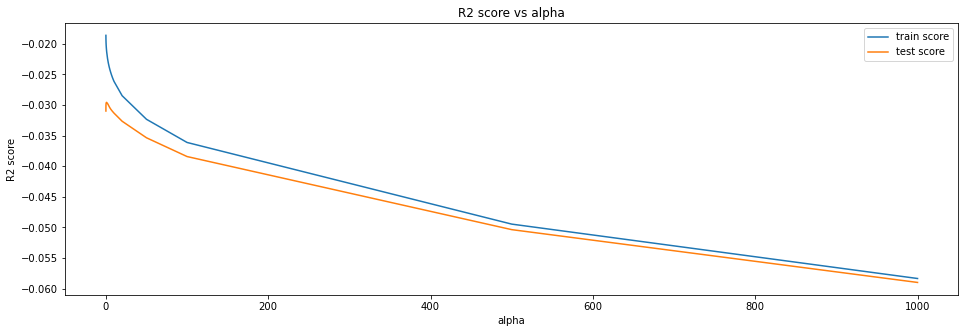

In [84]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(16, 5))

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.title("R2 score vs alpha")
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [85]:
# Predict SalePrice in train and test dataset for Ridge Regression
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Calculate metrics
metric_ridge = calculate_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 Score (Train) : 0.9465702946416407
R2 Score (Test) : 0.8905686057557454
RSS (Train) : 0.9073315270492079
RSS (Test) : 0.8344816442282796
MSE (Train) : 0.0008886694682166581
MSE (Test) : 0.0019052092333978988
RMSE (Train) : 0.029810559676340498
RMSE (Test) : 0.04364870253968494


### Lasso Regression

In [86]:
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.028561584010872786


In [88]:
# Fitting Lasso model for best hyperparameter alpha and printing coefficients which have been penalised
lasso_alpha = lasso_cv.best_params_['alpha']
lasso = Lasso(alpha = lasso_alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 0.00000000e+00  1.32918987e-01  8.22113775e-02  1.60445132e-02
 -0.00000000e+00  3.99613949e-02  0.00000000e+00  2.34924196e-02
  1.04410617e-02 -0.00000000e+00  9.34450620e-03  1.74793075e-02
  1.56904924e-02  1.31071001e-02  1.96719148e-02  0.00000000e+00
 -0.00000000e+00 -2.64895947e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -4.63883482e-04  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.39261375e-03
 -8.42199738e-03 -0.00000000e+00 -8.44241598e-03  4.43425092e-02
  4.37912007e-02  4.79919699e-02  3.72249565e-02  0.00000000e+00
  0.00000000e+00  3.86872342e-03  3.66231525e-03  3.11994925e-04
  4.03361601e-03 -0.00000000e+00  7.50991546e-03 -9.51924774e-03
 -0.00000000e+00 -0.00000000e+00  1.75940051e-03  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.07720764e-02  2.25792980e-02
  2.32327718e-03  3.05707535e-02 -2.27970697e-02 -0.00000000e+00
 -2.23038511e-02 -2.08462639e-02 -1.18922209e-03 -3.80953981e-03
  0.00000000e+00 -1.52730

In [89]:
# cv results
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.16e-02,7.50e-03,8.09e-03,7.08e-03,0.0,{'alpha': 0.0001},-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,2.06e-03,1,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,5.62e-04
1,8.98e-03,7.38e-03,4.57e-03,6.46e-03,0.0,{'alpha': 0.001},-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,2.27e-03,2,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,6.86e-04
2,7.86e-03,7.00e-03,3.27e-03,6.55e-03,0.01,{'alpha': 0.01},-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,2.93e-03,3,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,3.54e-04
3,4.17e-03,6.08e-03,0.00e+00,0.00e+00,0.05,{'alpha': 0.05},-0.10,-0.10,-0.10,-0.10,-0.11,-0.10,2.89e-03,4,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,6.25e-04
4,9.43e-03,7.70e-03,3.15e-03,6.29e-03,0.1,{'alpha': 0.1},-0.10,-0.10,-0.10,-0.10,-0.11,-0.10,2.89e-03,4,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,6.25e-04
5,3.13e-03,6.25e-03,3.12e-03,6.25e-03,0.2,{'alpha': 0.2},-0.10,-0.10,-0.10,-0.10,-0.11,-0.10,2.89e-03,4,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,6.25e-04
6,1.27e-02,6.36e-03,9.83e-05,1.97e-04,0.3,{'alpha': 0.3},-0.10,-0.10,-0.10,-0.10,-0.11,-0.10,2.89e-03,4,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,6.25e-04
7,5.28e-03,6.63e-03,3.13e-03,6.26e-03,0.4,{'alpha': 0.4},-0.10,-0.10,-0.10,-0.10,-0.11,-0.10,2.89e-03,4,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,6.25e-04
8,3.13e-03,6.25e-03,3.13e-03,6.26e-03,0.5,{'alpha': 0.5},-0.10,-0.10,-0.10,-0.10,-0.11,-0.10,2.89e-03,4,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,6.25e-04
9,6.25e-03,7.66e-03,3.12e-03,6.24e-03,0.6,{'alpha': 0.6},-0.10,-0.10,-0.10,-0.10,-0.11,-0.10,2.89e-03,4,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,6.25e-04


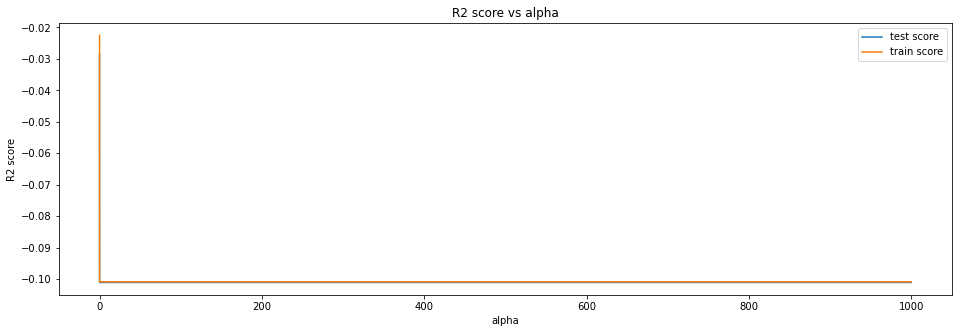

In [90]:
# plotting cv results
plt.figure(figsize=(16, 5))

plt.plot(lasso_cv_results["param_alpha"], lasso_cv_results["mean_test_score"])
plt.plot(lasso_cv_results["param_alpha"], lasso_cv_results["mean_train_score"])
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.title("R2 score vs alpha")
plt.legend(['test score', 'train score'], loc = 'upper right')

In [91]:
# Predict SalePrice in train and test dataset for Lasso Regression
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Calculate metrics
metric_lasso = calculate_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 Score (Train) : 0.9370383411015798
R2 Score (Test) : 0.8933318939804964
RSS (Train) : 1.0692010695304552
RSS (Test) : 0.813409873031433
MSE (Train) : 0.0010472096665332569
MSE (Test) : 0.0018571001667384314
RMSE (Train) : 0.03236061906906691
RMSE (Test) : 0.04309408505512597


In [92]:
# Creating a table which contains all the metrics
metric_dict = {'Metric' : ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)'],
            'Linear Regression' : metric_lr, 
            'Ridge Regression' : metric_ridge,
            'Lasso Regression' : metric_lasso}

metric_df = pd.DataFrame(metric_dict)
metric_df

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.58e-01,9.47e-01,9.37e-01
1,R2 Score (Test),-3.95e+18,8.91e-01,8.93e-01
2,RSS (Train),7.06e-01,9.07e-01,1.07e+00
3,RSS (Test),3.01e+19,8.34e-01,8.13e-01
4,MSE (Train),6.92e-04,8.89e-04,1.05e-03
5,MSE (Test),6.88e+16,1.91e-03,1.86e-03
6,RMSE (Train),2.63e-02,2.98e-02,3.24e-02
7,RMSE (Test),2.62e+08,4.36e-02,4.31e-02


### Lets observe the changes in the coefficients after regularization

In [93]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [94]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [95]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
LotShape,8.82e-03,7.45e-03,0.00e+00
OverallQual,1.13e-01,1.14e-01,1.33e-01
OverallCond,8.33e-02,7.43e-02,8.22e-02
ExterQual,1.59e-02,1.61e-02,1.60e-02
ExterCond,-1.18e-02,-8.35e-03,-0.00e+00
BsmtQual,3.75e-02,3.92e-02,4.00e-02
BsmtCond,-7.42e-03,6.57e-03,0.00e+00
BsmtExposure,2.35e-02,2.27e-02,2.35e-02
BsmtFinType1,1.04e-02,1.05e-02,1.04e-02
BsmtFinType2,-4.32e-03,-1.39e-03,-0.00e+00


In [96]:
# The top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False).head(10)

GrLivArea (log scale)    0.18
1stFlrSF (log scale)     0.12
OverallQual              0.11
LotArea (log scale)      0.11
RoofMatl_WdShngl         0.08
MSZoning_RL              0.08
MSZoning_FV              0.08
OverallCond              0.07
MSZoning_RM              0.07
MSZoning_RH              0.07
Name: Ridge, dtype: float64

In [97]:
# The top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False).head(10)

GrLivArea (log scale)    0.31
OverallQual              0.13
LotArea (log scale)      0.11
OverallCond              0.08
1stFlrSF (log scale)     0.06
MSZoning_RL              0.05
MSZoning_FV              0.04
MSZoning_RH              0.04
FullBath_3               0.04
BsmtQual                 0.04
Name: Lasso, dtype: float64

## Assignment Part II - Subjective Questions

### Question 1

#### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

##### What is the optimal value of alpha for ridge and lasso regression?

In [98]:
print('Optimal value of alpha for Ridge Regression is {}'.format(ridge_alpha))
print('Optimal value of alpha for Lasso is {}'.format(lasso_alpha))

Optimal value of alpha for Ridge Regression is 0.8
Optimal value of alpha for Lasso is 0.0001


##### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [99]:
# Let's build the ridge regression model with double value of alpha
ridge_temp = Ridge(alpha = (ridge_alpha * 2))

# Fit the model on training data
ridge_temp.fit(X_train, y_train)

# Predict SalePrice in train and test dataset for Ridge Regression
y_pred_train = ridge_temp.predict(X_train)
y_pred_test = ridge_temp.predict(X_test)

# Calculate metrics
ridge_metric_temp = calculate_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 Score (Train) : 0.9419942023339859
R2 Score (Test) : 0.891403822849283
RSS (Train) : 0.9850417220348301
RSS (Test) : 0.8281126005154023
MSE (Train) : 0.000964781314431763
MSE (Test) : 0.0018906680377063978
RMSE (Train) : 0.03106092906581777
RMSE (Test) : 0.04348181272332603


In [100]:
# Let's build the Lasso regression model with double value of alpha
lasso_temp = Lasso(alpha = (lasso_alpha * 2))

# Fit the model on training data
lasso_temp.fit(X_train, y_train)

# Predict SalePrice in train and test dataset for Ridge Regression
y_pred_train = lasso_temp.predict(X_train)
y_pred_test = lasso_temp.predict(X_test)

# Calculate metrics
lasso_metric_temp = calculate_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 Score (Train) : 0.92557063602232
R2 Score (Test) : 0.8938395013194127
RSS (Train) : 1.263943119697625
RSS (Test) : 0.809539055066199
MSE (Train) : 0.0012379462484795544
MSE (Test) : 0.0018482626827995411
RMSE (Train) : 0.035184460326677665
RMSE (Test) : 0.0429914256893109


In [101]:
# Creating a table which contains all the metrics
metric_dict_temp = {'Metric' : ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)'],
            'Ridge Regression' : ridge_metric_temp,
            'Lasso Regression' : lasso_metric_temp}

metric_df_temp = pd.DataFrame(metric_dict_temp)
metric_df_temp

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.42e-01,9.26e-01
1,R2 Score (Test),8.91e-01,8.94e-01
2,RSS (Train),9.85e-01,1.26e+00
3,RSS (Test),8.28e-01,8.10e-01
4,MSE (Train),9.65e-04,1.24e-03
5,MSE (Test),1.89e-03,1.85e-03
6,RMSE (Train),3.11e-02,3.52e-02
7,RMSE (Test),4.35e-02,4.30e-02


##### Changes in Ridge Regression metrics:
* R2 score of train set decreased from 0.947 to 0.92
* R2 score of test set remained same at 0.891

##### Changes in Lasso metrics:
* R2 score of train set decreased from 0.937 to 0.926
* R2 score of test set decreased from 0.893 to 0.894

##### What will be the most important predictor variables after the change is implemented?

In [102]:
betas_temp = pd.DataFrame(index=X_train.columns)
betas_temp.rows = X_train.columns
betas_temp['Ridge'] = ridge_temp.coef_
betas_temp['Lasso'] = lasso_temp.coef_

In [103]:
# The top 10 coefficients of Ridge regression in descending order
betas_temp['Ridge'].sort_values(ascending=False).head(10)

GrLivArea (log scale)    0.15
1stFlrSF (log scale)     0.11
OverallQual              0.11
LotArea (log scale)      0.09
OverallCond              0.07
MSZoning_RL              0.06
RoofMatl_WdShngl         0.05
MSZoning_FV              0.05
MSZoning_RM              0.05
MSZoning_RH              0.05
Name: Ridge, dtype: float64

In [104]:
# The top 10 coefficients of Lasso in descending order
betas_temp['Lasso'].sort_values(ascending=False).head(10)

GrLivArea (log scale)    0.28
OverallQual              0.14
LotArea (log scale)      0.09
OverallCond              0.08
1stFlrSF (log scale)     0.07
Neighborhood_Somerst     0.03
FullBath_3               0.03
BsmtQual                 0.03
GarageCars_3             0.03
Neighborhood_Crawfor     0.03
Name: Lasso, dtype: float64

### Question 2

#### You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

* It depends on what kind of business problem we are dealing with and use cases.
* If we have a high dimensionality and high correlation in the dataset, then we would want to prefer Lasso regularisation since it penalises less important features more and makes them zero which gives you the benefit of algorithmic feature selection and would make robust predictions.
* Ridge regularisation handles the model complexity by focusing more on the important features which contribute more to the overall error than the less important features.

### Question 3

#### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?



In [105]:
# The top 5 coefficients of Lasso in descending order
dropped_columns = betas['Lasso'].sort_values(ascending=False).head(5).index
dropped_columns

Index(['GrLivArea (log scale)', 'OverallQual', 'LotArea (log scale)',
       'OverallCond', '1stFlrSF (log scale)'],
      dtype='object')

In [106]:
# Drop the top 5 coefficients train and test data
X_train_dropped = X_train.drop(dropped_columns, axis = 1)
X_test_dropped = X_test.drop(dropped_columns, axis = 1)

In [107]:
# List of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso_temp = Lasso()

# Cross Validation
lasso_cv_temp = GridSearchCV(estimator = lasso_temp, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score = True,
                        verbose = 1)            

lasso_cv_temp.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
# Printing the best hyperparameter alpha
print(lasso_cv_temp.best_params_)
print(lasso_cv_temp.best_score_)

{'alpha': 0.0001}
-0.036381949203496675


In [109]:
# Fitting Lasso model for best hyperparameter alpha
lasso_alpha_temp = lasso_cv_temp.best_params_['alpha']

# Let's build the Lasso regression model with double value of alpha
lasso_temp = Lasso(alpha = lasso_alpha_temp)

# Fit the model on training data
lasso_temp.fit(X_train_dropped, y_train)

# Predict SalePrice in train and test dataset for Ridge Regression
y_pred_train = lasso_temp.predict(X_train_dropped)
y_pred_test = lasso_temp.predict(X_test_dropped)

# Calculate metrics
lasso_metric_temp = calculate_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 Score (Train) : 0.9076374377578558
R2 Score (Test) : 0.8620193509728968
RSS (Train) : 1.5684807557755076
RSS (Test) : 1.052187260036372
MSE (Train) : 0.0015362201329828674
MSE (Test) : 0.0024022540183478813
RMSE (Train) : 0.03919464418747627
RMSE (Test) : 0.04901279443520724


In [110]:
# Creating a table which contains all the metrics
metric_dict_temp = {'Metric' : ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)'],
            'Lasso Regression' : lasso_metric_temp}

metric_df_temp = pd.DataFrame(metric_dict_temp)
metric_df_temp

,Metric,Lasso Regression
0,R2 Score (Train),9.08e-01
1,R2 Score (Test),8.62e-01
2,RSS (Train),1.57e+00
3,RSS (Test),1.05e+00
4,MSE (Train),1.54e-03
5,MSE (Test),2.40e-03
6,RMSE (Train),3.92e-02
7,RMSE (Test),4.90e-02


In [111]:
betas_temp = pd.DataFrame(index=X_train_dropped.columns)
betas_temp.rows = X_train_dropped.columns
betas_temp['Lasso'] = lasso_temp.coef_

# The top 10 coefficients of Lasso in descending order
betas_temp['Lasso'].sort_values(ascending=False).head(5)

FullBath_3     0.09
MSZoning_RL    0.07
MSZoning_RH    0.07
MSZoning_RM    0.06
MSZoning_FV    0.06
Name: Lasso, dtype: float64

In [112]:
print('The new top 5 predictors are:')
for col in betas_temp['Lasso'].sort_values(ascending=False).head(5).index:
    print(col)

The new top 5 predictors are:
FullBath_3
MSZoning_RL
MSZoning_RH
MSZoning_RM
MSZoning_FV


### Question 4

#### How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

##### How can you make sure that a model is robust and generalisable?
* A model should not be impacted by outliers in the training data. In simple terms, model performance should remain same even when variation happens in data set.
* A model should be able to predict when new, previously unseen data, drawn from the same distribution as the one used to create the model is provided.
* A model should not overfit on training data, which can affect accuracy in predicting unseen data
* A model should not underfit as well, which fails to identify any relationship between target and predictor variables

In general, model should not be too complex. It should try to bring the variance to constant level by lightly adjusting bias.

##### What are the implications of the same for the accuracy of the model and why?

* We decrease variance which will lead to some bias, to make a robust and generalized model. Adding bias will decrease the accuracy of the model.
* Regularization helps in finding an optimal solution between accuracy and robutness to build a better model.